# **Introduction to Data Science Project** 💻

Professors: Alípio Jorge, Pedro Ferreira

Group C: Diogo Pedrosa (202006947), Mariana Pinto (202308355), Pedro Pedrosa (201907366)

# **Abstract**
In this project, we have in our hands the **"churn_data"** dataset, which contains
information about a telecom client's information, with 5000 entries with
18 different variables. To build a model that can predict if a client will churn or not, we will follow the CRISP-DM methodology, starting by visualizing and understanding the data, treating and transforming it and further optimising it in order to be apply it to different models, to try to reach our goal. We'll also do a qualitative and quantitative analysis to evaluate the performance of
each model and decide which is best.

#  **1. Business understanding**



In this work, we will analyse a telecommunication company's telecom churn dataset. From the company's standpoint, predicting the churn of a customer is essential to the financial state of the company. If it's possible to predict if a client will churn or not based on it's information, the business can take measures to try to retain that client, and in the end, keep a greater profit.

With this in mind the bussiness problem is the churn of people,  and the bussiness sucess criteria is to decrease the churn of people (applying campaigns and other retention strategies having the potential of predicting churn).

Now as data scientists, we have in our hands a dataset with a variety of past clients' information and whether they will churn or not. From our standpoint our objective is to try to build a model that can predict if a client will churn or not, so the company can use this information to increase retention rate.


## **Machine learning goal**

As data scientists, with the dataset in our hands, our objective is to be able to predict if a client will churn or not. With this in mind, the root of the problem consists of a binary classification problem, where with a given client's attributes, we need to classify it as it will churn or not. In this citation, we aim for high precision and for this, we will try to apply a variety of different models and evaluate them quantitatively and qualitatively so we can find a methodology that can give us the most accurate predictions possible.
(is important to state that we do not have any information on the loss and gains of the company regarding miss classifications, so we try to have great accuracy will trying to minimize false negatives so we minimize churn rate).

## **Imports**

Let's start by importing all necessary modules:

In [ ]:
pip install mixed-naive-bayes #this non-std library will be needed for using naive bayes for our data

In [ ]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, precision_score, accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from mixed_naive_bayes import MixedNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# **2. Data Understanding**




Before we build models and try to make predictions, it's essential to understand the data we are working with, so we can better apply the different methodologies, and in the end get better results.

Hence to start we will look at the different attributes and present a simple
qualitative analysis:

In [ ]:
#importing the dataset
df = pd.read_csv('/content/churn_data.csv')

In [ ]:
df.head(10)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128.0,no,yes,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0
1,No,107.0,no,yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
2,No,137.0,no,no,0.0,243.4,NaN,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0
3,No,84.0,yes,no,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0
4,No,75.0,yes,no,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0
5,No,118.0,yes,no,0.0,223.4,98.0,37.98,220.6,101.0,18.75,203.9,118.0,9.18,6.3,6.0,1.70,0.0
6,No,121.0,no,yes,24.0,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7.0,2.03,3.0
7,No,147.0,yes,no,0.0,157.0,79.0,26.69,103.1,94.0,8.76,211.8,96.0,9.53,7.1,6.0,1.92,0.0
8,No,117.0,no,no,0.0,184.5,97.0,31.37,351.6,80.0,29.89,215.8,90.0,9.71,8.7,4.0,2.35,1.0
9,No,141.0,yes,yes,37.0,258.6,84.0,43.96,222.0,111.0,18.87,326.4,97.0,14.69,11.2,5.0,3.02,0.0


### **2.1 Class**

Looking at the main class "churn", we can see it's binary, taking only two different values, **"yes"** if the client churns and **"no"** if the client doesn't churn.

### **2.2 Numerical Attributes**
Most of the dataset is composed of numerical attributes, however, it's worth
noting that we have both continuous and discrete attributes, so we grouped
them below:


**Continuous Attributes**

For continuous attributes we can group them in two categories:

➡ Attributes that relate to the total minutes that the client spent on call
in a given period of the day/to a specific location: **"totaldayminutes"**
(total minutes during the day), **"totaleveminutes"** (total minutes that the
client talked), **"totalnightminutes"** (total minutes during the night), **"totalintlminutes"** (total minutes tho foreign countries).

➡ Attributes that relate to the total value charge the client given the calls
made and messages sent in a given period of time: **"totaldaycharge"** (total value charged during the day), **"totalevecharge"** (total value charged),
**"totalnightcharge"** (total value charged during the night), **"totalintlcharge"**
(total value chearged due to services to foreign countries).


**Discrete Attributes**


For discrete attributes we also can group them into specific categories:

✔ An attribute that gives the duration of the client's account: **"accountlength"**.

✔ An attribute for the number of mail messages: **"numbervmailmessages"**.

✔ Attributes for the number of calls in a given period of the day/location
: **"totaldaycalls"** (total calls during the day), **"totalevecalls"** (total calls),
**"totalnightcalls"** (total calls during the night), **"totalintlcalls"** (total calls to a foreign country).

✔ An attribute to the number of calls to the customer service: **"numbercustomerservicecalls"**.

### **2.3 Categorical Attributes**

For categorical attributes, we have only binary attributes that take values of
**"yes"** or **"no"** describing if a client has a given plan or not, being **"internationalplan"** and **"voicemailplan"**.

### **2.4 Important side notes**
With analysis already made, we can already spot some information useful for
data transformation.
1. First and most obviously, we have different kinds of attributes,
namely numeric - for some algorithms it certainly will be pertinent to perform
discretizations.
2. It's also important to point out that the money spent on calls and messages can be obtained by the total number of calls and messages so it might be a good decision to remove that from the dataset to simplify it, but we analyse this aspect better in the correlation analysis.
3. There are very similar attributes qualitatively speaking for the total
number of calls and number of minutes and charge, so maybe it would be important to remove some if it doesn't introduce new information or summarize them in a more meaningful one (for example it's reasonable to think that there is no real correlation between the churn and just the total number of calls in the night, maybe we'll only need to consider the total number of calls).

### **2.5 Data visualization**
Now that we understand the types and meaning of the attributes that we have
in our hands, it's time to look at the data itself.
First let's analyse the overall statistics of the attributes and their distributions:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   object 
 1   accountlength               4951 non-null   float64
 2   internationalplan           4950 non-null   object 
 3   voicemailplan               4950 non-null   object 
 4   numbervmailmessages         4950 non-null   float64
 5   totaldayminutes             4950 non-null   float64
 6   totaldaycalls               4950 non-null   float64
 7   totaldaycharge              4950 non-null   float64
 8   totaleveminutes             4950 non-null   float64
 9   totalevecalls               4950 non-null   float64
 10  totalevecharge              4950 non-null   float64
 11  totalnightminutes           4950 non-null   float64
 12  totalnightcalls             4950 non-null   float64
 13  totalnightcharge            4950 

The first thing that stands out is the fact that **all the attributes have Null
values** - if we take a deeper look at the total number of customers with these
values, we find:

In [ ]:
print(f'Total number of costumers with Null parameters: {df.isna().sum().sum()}')

Total number of costumers with Null parameters: 849


Hence, since we have a total of 5000 customers, having 849 customers with
null values seems very significant (almost 20% of the clients in the data have at least one null value). So it is evident that this is a problem that needs to be addressed in data processing **(Problem 1)**.

___
Now moving on to the **distributions of the data**:

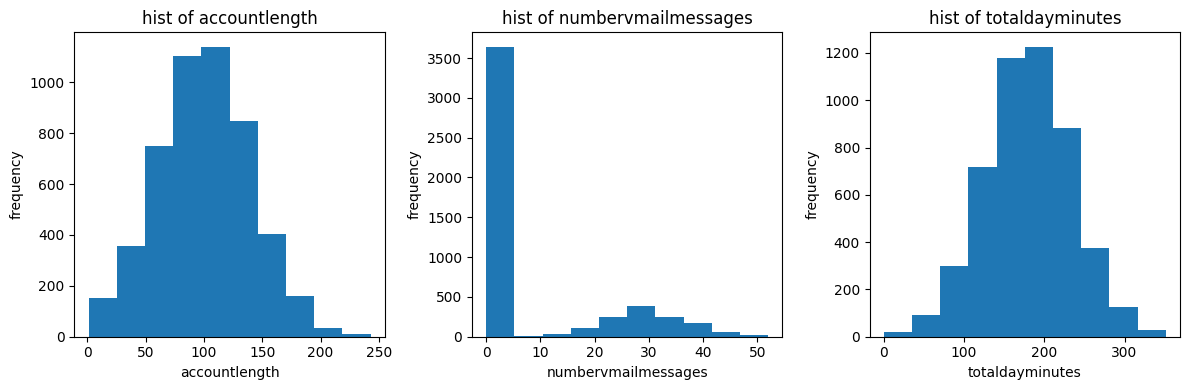

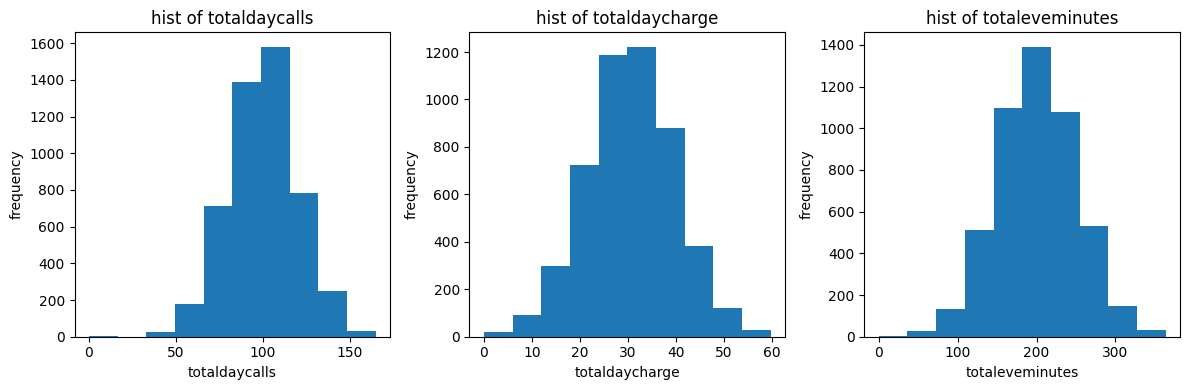

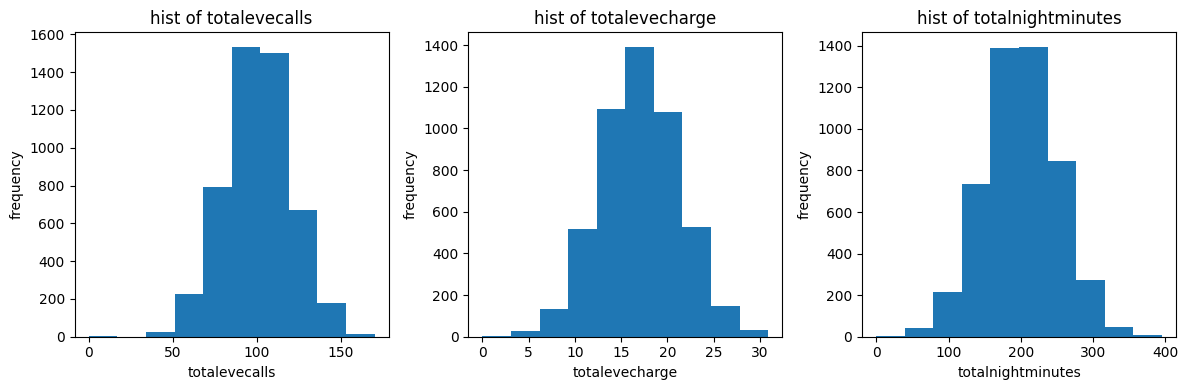

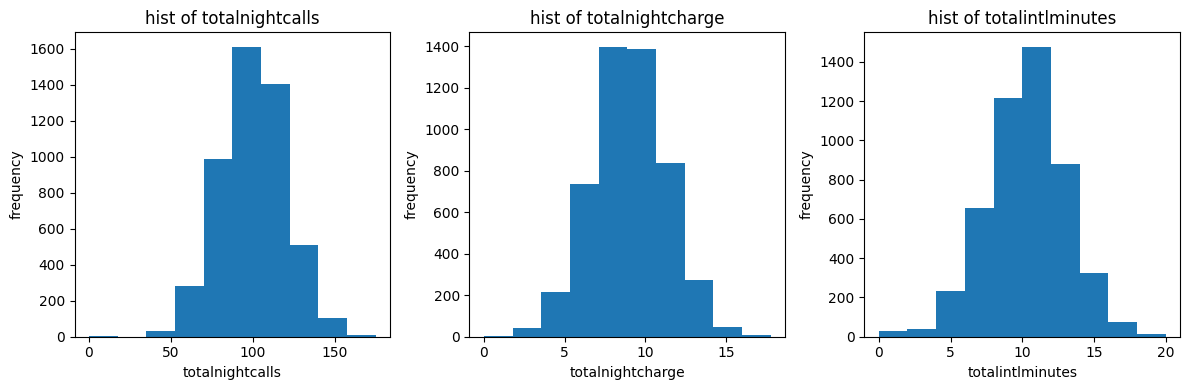

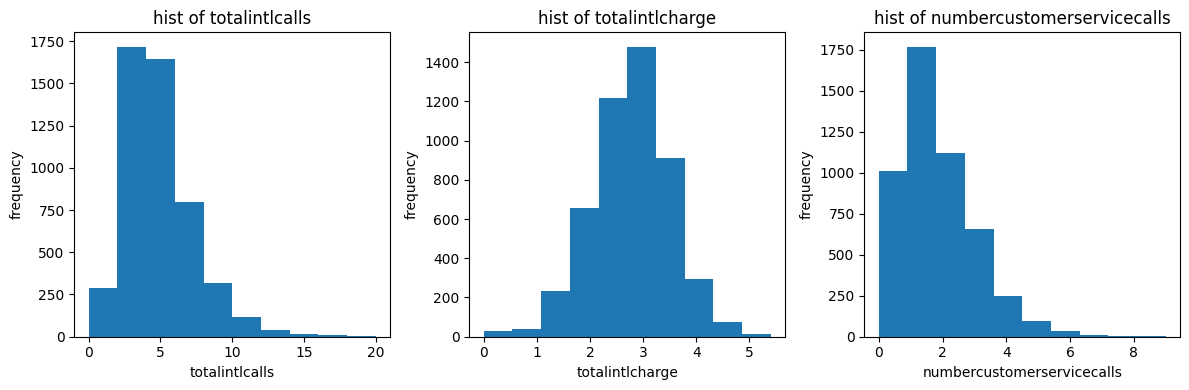

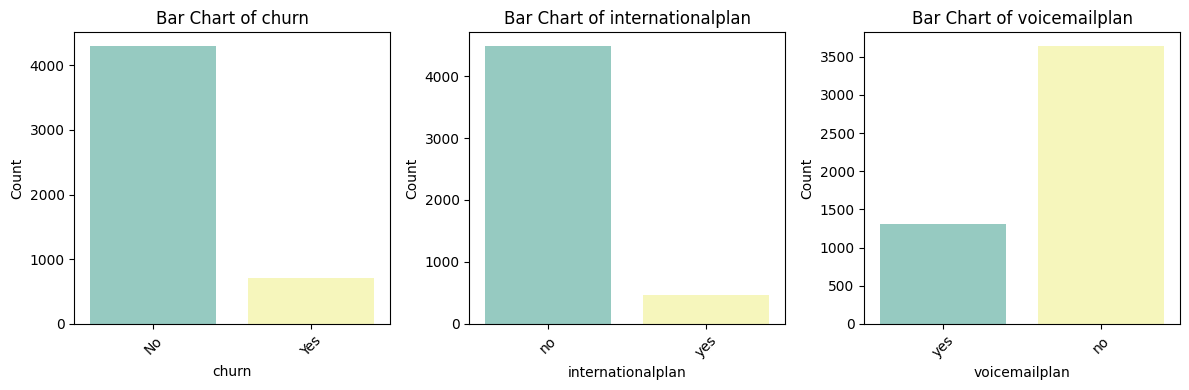

In [ ]:
numeric_columns = df.select_dtypes(include = ['float64', 'int64'])

categorical_colums = df.select_dtypes(include = ['object'])

j=0
for colum in numeric_columns:
    if (j==0):
      plt.figure(figsize=(12, 4))

    plt.subplot(1,3,j+1)

    plt.hist(df[colum])
    plt.title(f"hist of {colum}")
    plt.xlabel(colum)
    plt.ylabel("frequency")

    j+=1
    j=j%3

    if (j==0):
      plt.tight_layout()
      plt.show()

plt.figure(figsize=(12, 4))
for (i,colum) in enumerate(categorical_colums):
  plt.subplot(1,3,i+1)
  sns.countplot(data=df, x=colum, palette='Set3')
  plt.title(f'Bar Chart of {colum}')
  plt.xlabel(colum)
  plt.ylabel('Count')
  plt.xticks(rotation=45) #would rotate x labels if no space
plt.tight_layout()
plt.show()

Firstly, looking at the **numerical variables, we find that apart from the "numbervmailmessages", they all seem to follow a normal distribution/lognormal
distribution** (the last one is basically a normal distribution that doesn't take negative values, which makes sense because none of the attributes can take negative values). This will come in handy because there a lot of normal assumptions in some of the algorithms. Now, the said "numbervmailmessages" variable is more often than not found as zero in most customers, however, in the few cases in which it isn't we see the values follow a normal. This is a case in which discretization is evident, and also shows a problem that is also present in the **categorical atributes**. Basically in this attribute the **data is not balanced**, or in other words, it is very biased to a specific value - this can lead to problems in the prediction algorithms because they can lead the algorithm into misclassifying the rarest cases. This is a sign that maybe we'll need to construct a subset of the data that is balanced for training.

Let's now take a peek at the point summary for each attribute:

In [ ]:
print("5-point summary for every attribute:")
print(df.describe(include='all') )

5-point summary for every attribute:
       churn  accountlength internationalplan voicemailplan  \
count   5000    4951.000000              4950          4950   
unique     2            NaN                 2             2   
top       No            NaN                no            no   
freq    4293            NaN              4481          3638   
mean     NaN     100.238295               NaN           NaN   
std      NaN      39.718817               NaN           NaN   
min      NaN       1.000000               NaN           NaN   
25%      NaN      73.000000               NaN           NaN   
50%      NaN     100.000000               NaN           NaN   
75%      NaN     127.000000               NaN           NaN   
max      NaN     243.000000               NaN           NaN   

        numbervmailmessages  totaldayminutes  totaldaycalls  totaldaycharge  \
count           4950.000000      4950.000000    4950.000000     4950.000000   
unique                  NaN              NaN    

As we can see for the actual values that the numerical attributes take, there are **strange
values for the total calls and total minutes in calls** (and in consequence in the total pay) in the different periods. In general, these values are much bigger in comparison to the expected in normal circumstances. Being more concrete, it seems very odd that the mean for the number of calls during the day happens to be 100 - way bigger than the expected mean. However in the end there isn't a lot to do about this - perhaps this data is regarding a special niche of business people, or has some other explanation - therefore we'll just proceed to work with these values.

For the **categorical attributes and the output class, they're all obviously not
balanced**. There are **A LOT** more people with no **"voicemailplan"** and **"internationalplan"**, and most importantly, most of the people don't churn the company.
Again this might be problematic and it's a sign that we'll need a balanced
subset of the data.

_____
Now we will make another analysis of the distribution of the attributes by
**visualizing the box plots** along with the **number of outliers** for each attribute (of course only applicable in the numerical attributes):

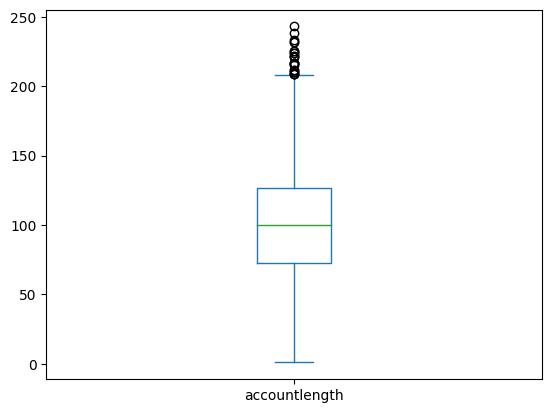

nr_total = 5000, nr_non_outliers = 4927, nr_outliers = 73


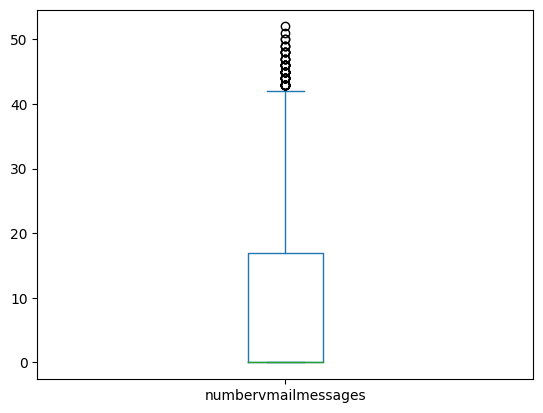

nr_total = 5000, nr_non_outliers = 4890, nr_outliers = 110


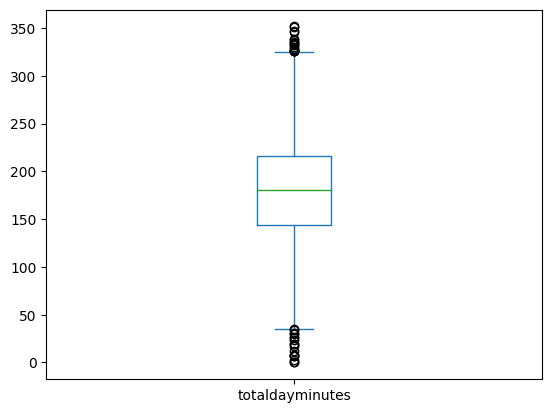

nr_total = 5000, nr_non_outliers = 4915, nr_outliers = 85


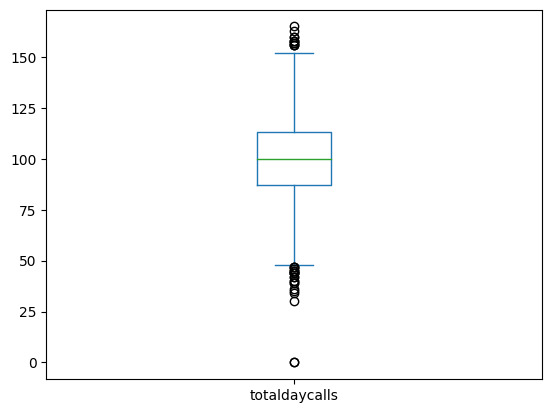

nr_total = 5000, nr_non_outliers = 4915, nr_outliers = 85


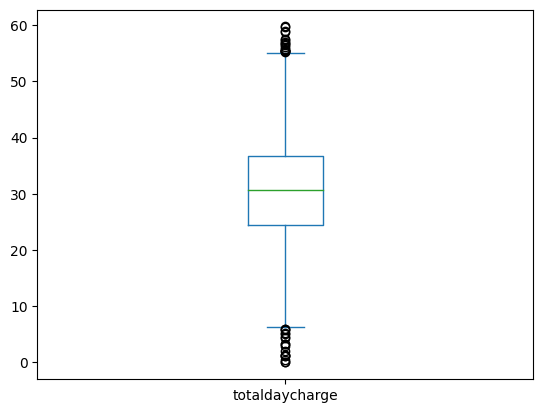

nr_total = 5000, nr_non_outliers = 4914, nr_outliers = 86


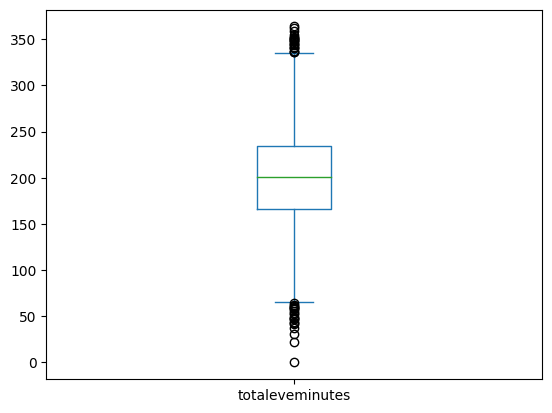

nr_total = 5000, nr_non_outliers = 4908, nr_outliers = 92


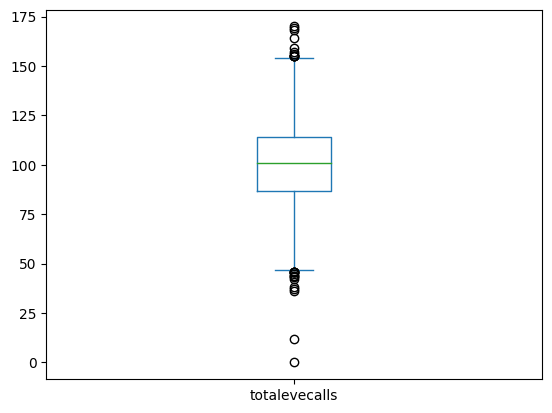

nr_total = 5000, nr_non_outliers = 4923, nr_outliers = 77


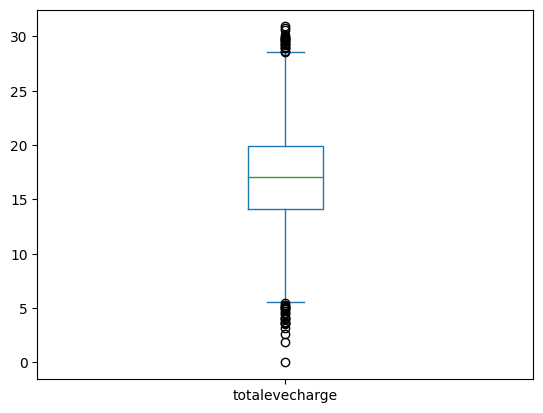

nr_total = 5000, nr_non_outliers = 4908, nr_outliers = 92


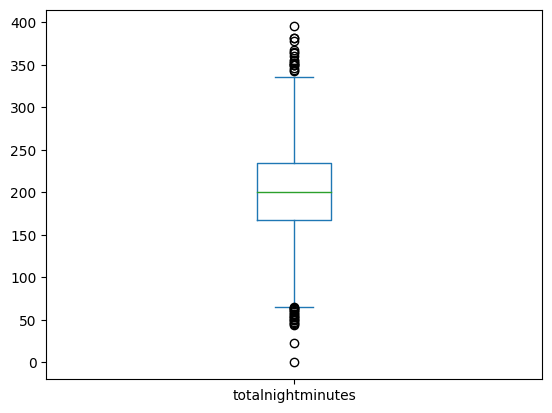

nr_total = 5000, nr_non_outliers = 4911, nr_outliers = 89


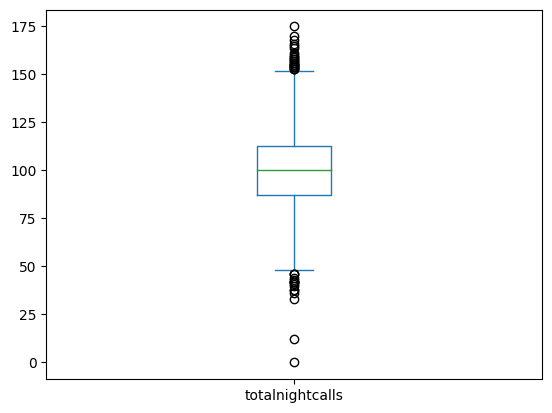

nr_total = 5000, nr_non_outliers = 4907, nr_outliers = 93


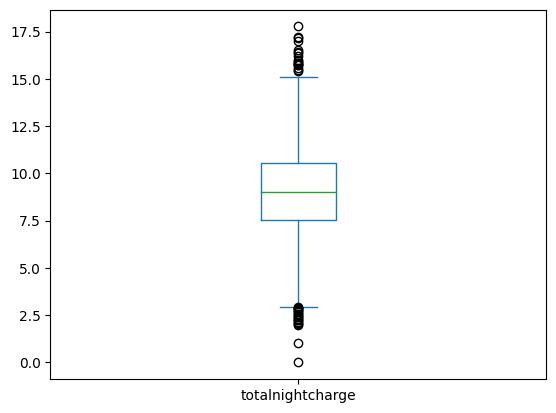

nr_total = 5000, nr_non_outliers = 4911, nr_outliers = 89


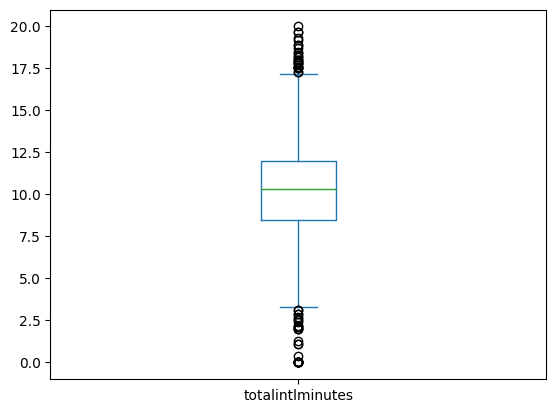

nr_total = 5000, nr_non_outliers = 4879, nr_outliers = 121


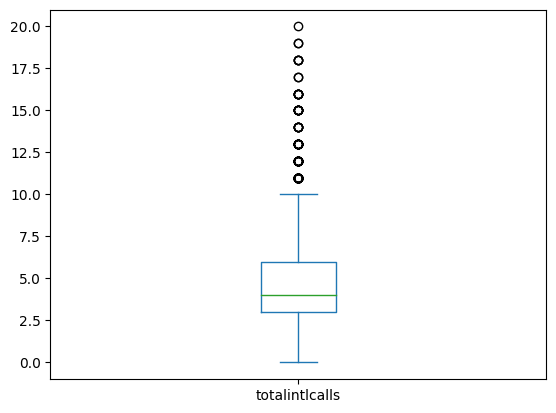

nr_total = 5000, nr_non_outliers = 4836, nr_outliers = 164


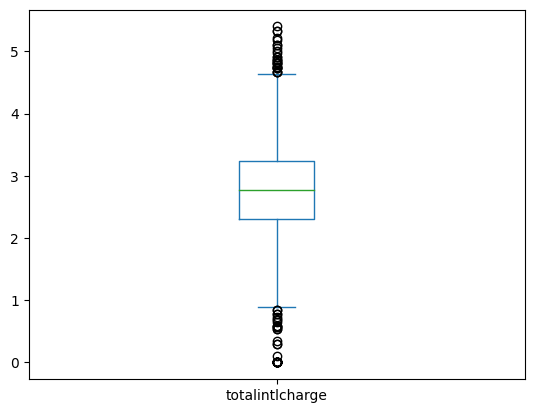

nr_total = 5000, nr_non_outliers = 4880, nr_outliers = 120


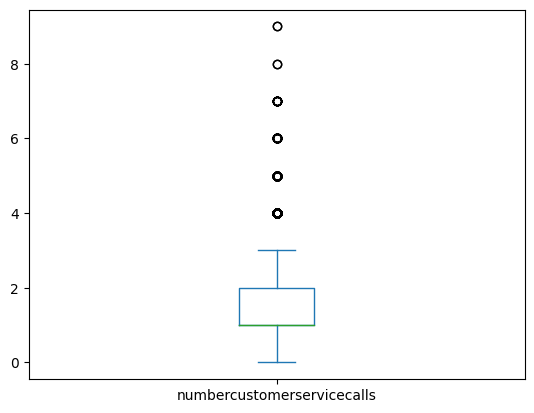

nr_total = 5000, nr_non_outliers = 4558, nr_outliers = 442


In [ ]:
for column in df.columns:
    data_series = df[column]
    if (data_series.dtype!='object'):
        data_series.plot.box()
        plt.show()
    #computing IQR
        Q1 = data_series.quantile(0.25)
        Q3 = data_series.quantile(0.75)
        IQR = Q3 - Q1

    #usual 1.5 IQR Rule (further down we'll use 1.7)
        filtered = df.query('(@Q1 - 1.5 * @IQR) <='+ column + '<= (@Q3 + 1.5 * @IQR)')

        nr_total = len(data_series)
        nr_non_outliers = len(filtered)
        nr_outliers = nr_total - nr_non_outliers

        print('nr_total = '+str(nr_total) + ', nr_non_outliers = '+str(nr_non_outliers)+', nr_outliers = '+str(nr_outliers))

At first glance, we can see that **in all box-plots there are values that can be
considered outliers**. So it is obvious that in the data processing, we have to
do something about it, but we can go a bit further and analyse if the
outliers of each class are common for a group of clients or spread along different ones.

___
To wrap up this section we will take a look at the correlation between the different attributes to gain even more understanding of the data (and maybe detect attributes that can be discarded):

   churn  accountlength  internationalplan  voicemailplan  \
0      0          128.0                0.0            1.0   
1      0          107.0                0.0            1.0   
2      0          137.0                0.0            0.0   
3      0           84.0                1.0            0.0   
4      0           75.0                1.0            0.0   

   numbervmailmessages  totaldayminutes  totaldaycalls  totaldaycharge  \
0                 25.0            265.1          110.0           45.07   
1                 26.0            161.6          123.0           27.47   
2                  0.0            243.4            NaN           41.38   
3                  0.0            299.4           71.0           50.90   
4                  0.0            166.7          113.0           28.34   

   totaleveminutes  totalevecalls  totalevecharge  totalnightminutes  \
0            197.4           99.0           16.78              244.7   
1            195.5          103.0           

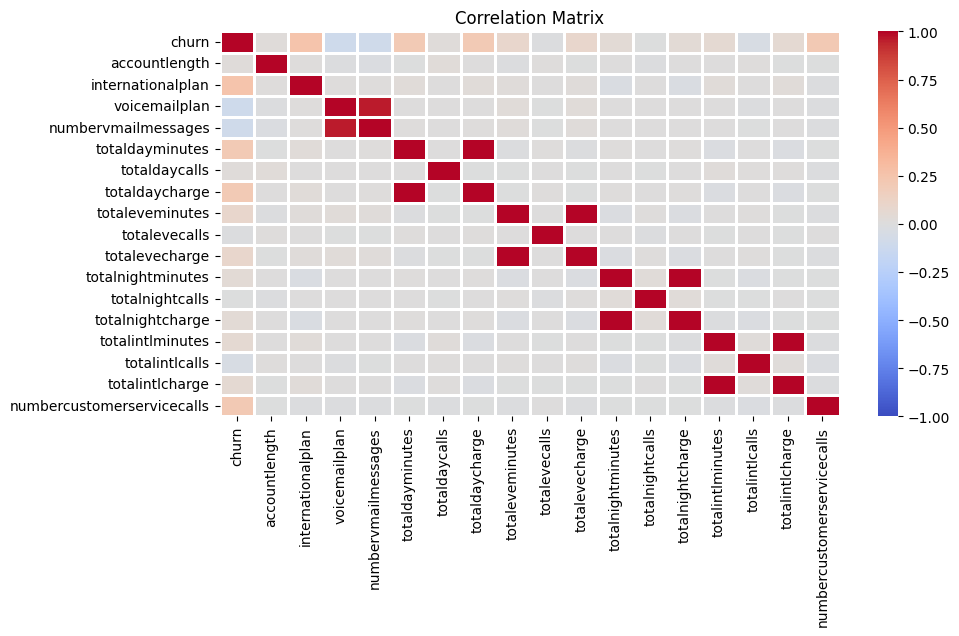

In [ ]:
df_01 = df.replace({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0})

print(df_01.head(5))

num_vars = ['numbervmailmessages', 'totaldayminutes', 'totaldaycharge', 'totaleveminutes', 'totalevecharge',
                'totalnightminutes', 'totalnightcharge', 'totalintlminutes', 'totalintlcharge', 'accountlength',
                'totaldaycalls', 'totalevecalls', 'totalnightcalls', 'totalintlcalls', 'numbercustomerservicecalls']

catg_vars = ['churn', 'internationalplan', 'voicemailplan']

total =['numbervmailmessages', 'totaldayminutes', 'totaldaycharge', 'totaleveminutes', 'totalevecharge',
                'totalnightminutes', 'totalnightcharge', 'totalintlminutes', 'totalintlcharge', 'accountlength',
                'totaldaycalls', 'totalevecalls', 'totalnightcalls', 'totalintlcalls', 'numbercustomerservicecalls','churn', 'internationalplan', 'voicemailplan' ]

print(total)

correlation_matrix = df_01.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, cmap= "coolwarm" ,fmt=".2f", linewidths=1, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

✔ We can see that most of the attributes have little to no correlation. The
only ones that have a **clear correlation** (and we can see that is very high) **are the total number of minutes spent on calls on a given period of the day and the total amount of money that was paid for that period**. These were expected correlations, once that typically the money paid is linear to the amount of time spent on the call.

✔ Also the **number of mail messages has a high correlation with the presence of a mail plan**, which is also not a surprise.

✔ To finish, we also plot the **correlation on the churn to the attributes** and we can see that some of them have more correlation compared to the rest (and probably will be the most significant ones to predict): **they are the international plan, total minutes during the day and the charge, and the number of customer service calls**. The last one is quite obvious, people just tend to make calls the customer service if they have problems so are more likely to leave, but the other ones are not so obvious he correlation. (It is important to note that to make the correlation analysis including the categorical attributes we did a simple transformation of transforming the yes or no into 1 and 0).

# **3. Data Preparation**

First we'll work on the **null values**. As we said before we have a total of 849 total clients with null values on their parameters, so the "easy way out" of removing them all is not a good choice, at least for all attributes. Therefore, the first way around this would be to try **data imputation**.

To begin this it's important to note that we won't be able to impute every single value: every case is different, hence taking into account all the information regarding the attributes of the customer will lead us to decide whether to impute values or disregard the customer entirely.

Therefore the decision that we made was to **input the attributes of the clients that have only one or fewer missing values** - these are the ones that we probably can impute with the most precision (and also we only imputed numeric values).
The imputing method adopted is based on using a linear regression considering all the numeric attributes excluding the attribute that the value we want to input belongs to a try to predict the missing one with the non-null values from the specific client.

In [ ]:
#function to fill missing values using linear regression
warnings.filterwarnings("ignore")
def fill_missing_with_regression(df, colum_list):
    df_copy = df.copy() #start by creating copy of the DataFrame to avoid modifying the original
    numb_dif = 0
    for column_to_fill in colum_list:
      #initially identify the features (columns) for regression

      features = df_copy.columns[num_vars.remove(column_to_fill)]
      """
      # f = []
      for c in features:
        print(c)
        f.append(c)
      """
      #iterating through the rows with missing values in the specified column
      for index, row in df_copy[df_copy[column_to_fill].isnull()].iterrows():
          if row.isna().sum().sum() > 1:
            continue
          # Prepare training data
          #train_data = df_copy.dropna(subset=[column_to_fill])

          numb_dif += 1
          train_data = df_copy.dropna()
          #train_data.info()
          X_train = train_data[[name for name in num_vars if name != column_to_fill]]
          y_train = train_data[column_to_fill]

          #data preparation (reshaping)
          X_pred = row[[name for name in num_vars if name != column_to_fill]].values.reshape(1, -1)

          model = LinearRegression()
          model.fit(X_train, y_train)

          predicted_value = model.predict(X_pred)[0]

          #fill missing in the copy
          df_copy.at[index, column_to_fill] = predicted_value

    print("numb_dif =",numb_dif)
    return df_copy

#fill missing values, applying the function
df_filled = fill_missing_with_regression(df_01,num_vars )

df_filled.info()

numb_dif = 348
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   int64  
 1   accountlength               4951 non-null   float64
 2   internationalplan           4950 non-null   float64
 3   voicemailplan               4950 non-null   float64
 4   numbervmailmessages         4995 non-null   float64
 5   totaldayminutes             4950 non-null   float64
 6   totaldaycalls               4992 non-null   float64
 7   totaldaycharge              4995 non-null   float64
 8   totaleveminutes             4950 non-null   float64
 9   totalevecalls               4950 non-null   float64
 10  totalevecharge              4994 non-null   float64
 11  totalnightminutes           4950 non-null   float64
 12  totalnightcalls             4991 non-null   float64
 13  totalnightcharge  

In [ ]:
print("Number of missing values =",df_filled.isna().sum().sum())

Number of missing values = 501


We can see that the number of missing values is now a little over half of what it was before. This is a good improvement but still *not quite enough*. We'll deal with this in the next block, as in the end we'll **discard every customer with null values** (that is, every customer that has 2 or more null values).

Regarding outliers, we'll adopt a similar approach, in the sense that we'll either impute values if a customer has 1 outlier, or discard him if he turns out to have 2 or more. It's also noteworthy to point out that instead of using the standard $\pm 1.5 \,\text{IQR}$ rule, we used $1.7$, so that we don't discard as many values.

In [ ]:
warnings.filterwarnings("ignore")
const = 0
print("shape =",df_filled.shape)

df = df_filled.copy()
df_Copy = df.copy()

column_quartiles = {}
for column in df.columns:
    data_series = pd.to_numeric(df[column], errors='coerce').dropna()
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    column_quartiles[column] = (Q1, Q3)

print("Quartile Ranges:")
print(column_quartiles)
print("----------------------------------------")

num_rows, num_columns = df.shape

outliers_series = pd.Series([False] * num_rows)

for index, row in df.iterrows():
    numeric_row = pd.to_numeric(row, errors='coerce').dropna()

    #check for outliers
    row_outliers = any(
        (numeric_row[column] < column_quartiles[column][0] - 1.7 * (column_quartiles[column][1] - column_quartiles[column][0])) |
        (numeric_row[column] > column_quartiles[column][1] + 1.7 * (column_quartiles[column][1] - column_quartiles[column][0]))
        for column in numeric_row.index
    )

    outliers_series[index] = row_outliers

outliers_index = outliers_series[outliers_series].index

print("indexes of outlier rows: ")
print(outliers_index)
print("------------")

########################################
series_length = num_rows
discard_series = pd.Series([False] * series_length)

for index in outliers_index:
    numeric_row = pd.to_numeric(df.loc[index], errors='coerce').dropna()

    row_outliers = [
        (numeric_row[column] < column_quartiles[column][0] - 1.7 * (column_quartiles[column][1] - column_quartiles[column][0])) |
        (numeric_row[column] > column_quartiles[column][1] + 1.7 * (column_quartiles[column][1] - column_quartiles[column][0]))
        for column in numeric_row.index
    ]
    num_row_outliers = sum(row_outliers)

    if num_row_outliers >= 2:
        discard_series[index] = True #if 2 or more outliers, discard the customer
    elif num_row_outliers == 1: #if 1, impute with LR!
        const +=1
        #index_outlier = np.where(row_outliers==True)
        index_outlier = -1
        #print(row_outliers)
        for i, bool in enumerate(row_outliers):
            if (bool==True):
                index_outlier = i #index of the column of outlier
                break

        #save all categorical columns
        #remove outlier column and keep Y
        #obtain training data, X_train: every column except outlier, Y_train all values of outlier vars (not in this customer)
        #apply LR

        col_index = index_outlier

        if (col_index == 2 or col_index == 0 or col_index == 3): #outliers in the ignored categorical (corresponding indexes)
          continue

        else:
          X = df.drop(columns=[df.columns[col_index]])

          y = df.iloc[:, col_index]  # Y_train

          feature_names = X.columns.tolist() # with dropping we lose the order
          #######################################################
          rows_to_drop = X[X.isnull().any(axis=1)].index
          rows_to_drop = X[X.isnull().any(axis=1) | y.isnull()].index
          X = X.drop(index=rows_to_drop)
          y = y.drop(index=rows_to_drop)
          #######################################################
          row_index_to_impute = index

          try:
              X_train, X_test, y_train, y_test = train_test_split(X.drop(index=row_index_to_impute), #drop for training/test the rows we want to impute
                                                          y.drop(index=row_index_to_impute),
                                                          test_size=0.2, random_state=21)
              # LR
              model = LinearRegression()
              model.fit(X_train, y_train)

              #predict missing values
              X_to_impute = X.loc[index][feature_names].values.reshape(1, -1) #removes feature_names
              y_pred_to_impute = model.predict(X_to_impute)

              df_Copy.iloc[index, col_index] = y_pred_to_impute #save in copy so this value doesn't affect future LR imputes
          except KeyError:
              discard_series[index] = True

print("----------------------------------")

print("Discard Status for Each Row:")
print(discard_series)

print("Total number of customers with 2 or more outlier attributes:",np.sum(discard_series))
print("Total number of customers with 1 outlier attribute:",const)

df_filtered = df_Copy[~df_Copy.index.isin(discard_series)] #final discard

shape = (5000, 18)
Quartile Ranges:
{'churn': (0.0, 0.0), 'accountlength': (73.0, 127.0), 'internationalplan': (0.0, 0.0), 'voicemailplan': (0.0, 1.0), 'numbervmailmessages': (0.0, 16.0), 'totaldayminutes': (143.7, 216.2), 'totaldaycalls': (87.0, 113.0), 'totaldaycharge': (24.43, 36.75), 'totaleveminutes': (166.425, 234.1), 'totalevecalls': (87.0, 114.0), 'totalevecharge': (14.14, 19.9), 'totalnightminutes': (167.0, 234.7), 'totalnightcalls': (87.0, 113.0), 'totalnightcharge': (7.51, 10.56), 'totalintlminutes': (8.5, 12.0), 'totalintlcalls': (3.0, 6.0), 'totalintlcharge': (2.3, 3.24), 'numbercustomerservicecalls': (1.0, 2.0)}
----------------------------------------
indexes of outlier rows: 
Int64Index([   3,    4,    5,    7,    8,    9,   10,   14,   15,   21,
            ...
            4963, 4976, 4977, 4980, 4981, 4982, 4990, 4991, 4996, 4999],
           dtype='int64', length=1379)
------------
----------------------------------
Discard Status for Each Row:
0       False
1       

Now that we have done the general transformations in the data so it is better suited to be used in the models, we need to **define the training and validation sets.** And recalling that we have an unbalanced dataset in our hands, we will apply the models in a normal dataset (removed directly from the treated data) and a balanced one (the number of clients in the yes or no for churn are the same).

First off regarding the unbalanced dataset, we decided that it would be just the dataset after the transformations made in the data processing topic. The balanced set on the other hand will be a portion of that same dataset, but we will **remove cases of the not churn class** so that the yes and no classes have the same size (this is our first approach but given that it results in a very tiny dataset, we may do oversampling of the data or data multiplication).

Now the training and validation sets will just be a random split of the data for both balanced and unbalanced ones, where the training set will have $80\%$ of the data, and the validation set will be the remaining $20\%$.

In [ ]:
# print(df.columns) #0 -> churn; 2-> international plan, 3-> voicemailplan, col_indexes
df_filled_test = df_filtered.copy()
df_filled_test = df_filled_test.dropna()

df_filled = df_filled_test.copy()

In [ ]:
X = df_filled.drop(columns = ["churn"])
y = df_filled["churn"]

train_data = pd.concat([X, y], axis=1)

#separate classes in the training set
class_0 = train_data[train_data['churn'] == 0]
class_1 = train_data[train_data['churn'] == 1]

#determine the size of minority class
minority_class_size = min(len(class_0), len(class_1))

#resample majority class to match the size of the minority class
class_0_resampled = resample(class_0, replace=False, n_samples=minority_class_size, random_state=42)

#balanced dataset
df_balanced = pd.concat([class_0_resampled, class_1])

#umbalanced dataset
df_umbalanced = df_filled


In [ ]:
#definition of the training set and validation sets of both datasets
#(in some methods we may need to define them again because we need to use a transformed set specifically for the data, but in
# that case to generate the split we will use the same seed, 42)

#for the unbalanced
X = df_umbalanced.drop('churn', axis=1)
y = df_umbalanced['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#for the balanced

Xb = df_balanced.drop('churn', axis=1)
yb = df_balanced['churn']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=42)

# **4. Modelling**

Now that we've dealt with the hyperparameters, it's time to evaluate the model: we decided to perform a **K-Fold Cross Validation**, analysing the **metrics** of **Accuracy, Recall** and **Precision**. We'll start with the unbalanced dataset, and after this initial analysis, we'll use the best models to work with the balanced one. However it's important that in both cases these metrics need to be analysed carefully - for example, assuming that missing a client who is likely to churn (false negative) has worse consequences than predicting that a client churns when in fact he doesn't (false positive), we're looking to give special emphasis to **Recall**. **Accuracy** is also an overall important metric but can be misleading when considering the unbalanced dataset, as the overwhelming proportion of **"Yes"/ "No" = 0.86**, will certainly lead to a bias towards "Yes" (in this case a random guessing model working with this proportion should have around $86\%$ accuracy). With this in mind, we found it was reasonable to define a custom scoring: that is, instead of having an equal weight of $\frac{1}{3}$
for all the 3 different metrics , we used $[0.3, 0.5, 0.3]$, respectively for accuracy, recall and precision.

### **4.1 K-Nearest Neighbours (KNN) model**

The nature of the KNN classifier is to classify a point based on the class of the neighbours. Knowing this, the essential parameters that we need to optimize are the **number of neighbours** considered to classify a giving point, and of course, the **distance metric** used to define the distance between two points in the data to decide the neighbours of a point (there is also a parameter that is somewhat related to the metrics that if the weight of the neighbours is uniform or not that will be also considered).

Also, a very important step that is related to the kNN algorithm is the importance of **data normalization**. More precisely the fact that for numerical attributes it is important to make sure they're all in a **similar scale**, so that all of them have the same importance when calculating a distance, and of course, we need to transform the categorical attributes in a way that we can calculate the distances between points.

So our decision was, **for the numerical attributes just apply a standardization**, that is scale the numerical attributes by its standard deviation and mean (so they all take similar values in the same scale). **For the categorical attributes we choose to just substitute the yes and no by 1 or zero** (we did this in this form for simplicity, and also to not overcomplicate the data set with even more attributes, but in this form, there is the possible introduction of artificial distances that were not present in the data before the transformation - one way to make this different is to make one hot encoding but this creates more dimensions in the dataset so in the end it's always a trade-off, so we chose the simpler option).

In [ ]:
#making the transformations referred above
from sklearn.preprocessing import StandardScaler
numerical_cols = ['numbervmailmessages', 'totaldayminutes', 'totaldaycharge', 'totaleveminutes', 'totalevecharge',
                'totalnightminutes', 'totalnightcharge', 'totalintlminutes', 'totalintlcharge', 'accountlength',
                'totaldaycalls', 'totalevecalls', 'totalnightcalls', 'totalintlcalls', 'numbercustomerservicecalls']


df_knn = df_umbalanced.copy()

scaler = StandardScaler()
df_knn[numerical_cols] = scaler.fit_transform(df_knn[numerical_cols])


#for the unbalanced
Xk = df_knn.drop('churn', axis=1)
yk = df_knn['churn']

Xk_train, Xk_test, yk_train, yk_test = train_test_split(Xk, yk, test_size=0.2, random_state=42)


df_knn.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
2,0,0.929392,0.0,0.0,-0.580850,1.165460,0.054848,1.167479,-1.559461,0.494640,-1.559973,-0.749599,0.220698,-0.748335,0.697811,0.305228,0.691420,-1.246396
3,0,-0.410131,1.0,0.0,-0.580850,2.200624,-1.488936,2.203375,-2.727222,-0.620360,-2.727620,-0.066912,-0.547426,-0.067193,-1.334277,1.205701,-1.341396,0.457827
4,0,-0.637597,1.0,0.0,-0.580850,-0.252345,0.662110,-0.251438,-1.025796,1.102822,-1.024802,-0.265946,1.091238,-0.266228,-0.064222,-0.595246,-0.062472,1.309939
5,0,0.449186,1.0,0.0,-0.580850,0.795759,-0.106120,0.797516,0.397967,0.038504,0.397688,0.072412,0.937613,0.074342,-1.443139,0.755464,-1.449095,-1.246396
6,0,0.525008,0.0,1.0,1.231598,0.699636,-0.618274,0.700672,2.916629,0.393276,2.916004,0.245571,0.937613,0.246839,-1.007692,1.205701,-1.004837,1.309939


Now that we've taken care of this we're ready to jump to our hyperparameter tuning. We performed a grid search in the following parameters:



1.   $K \in [2,3, 4,5, 7, 10, 15, 20, 25, 30, 50, 100]$
2.   weights $ \in ['uniform', 'distance'] $
3.   metric $\in ['euclidean', 'manhattan', 'nan\_euclidean']$


The values chosen for $K$ sweep different orders of magnitude to sweep a bigger range of the parameter. Usually, though, it's a general idea to not overdo it in terms of this parameter as large $K$ can induce over-memorization by the model, which will directly lead to overfitting. We also considered giving both uniform and different weights to the $K$ nearest neighbours and tried the most commonly useful metrics.

In [ ]:
#defining parameter grid to search
param_grid = {
    'n_neighbors': [2,3, 4,5, 7, 10, 15, 20, 25, 30, 50, 100],  #different values of K
    'weights': ['uniform', 'distance'],  #weighting schemes
    'metric': ['euclidean', 'manhattan', 'nan_euclidean' ]  #distance metrics
}

#custom scorer function, focusing on recall! (of course, doesn't necessarily have to sum to 1)
def custom_scoring(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    score = 0.3 * precision + 0.3 * accuracy + 0.5 * recall
    return score
custom_scorer = make_scorer(custom_scoring, greater_is_better=True)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

knn_model = KNeighborsClassifier()

#GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring=custom_scorer,n_jobs=5, verbose=1, cv=kf )
grid_search.fit(Xk, yk)

print(grid_search.best_params_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


As we can see in the end the best parameters for KNN turned out to be $K = 5$ neighbours, considering uniform weights and the euclidean metric, with the following results:

In [ ]:
#now we create a model with the optimal parameters found, to see its actual performance

knn_best_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 5 , weights = 'uniform')

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall']

#this gives the accuracies of all folds made
cv_scores = sklearn.model_selection.cross_validate(knn_best_model, Xk, yk, cv=kf, scoring=scoring)

print('accuracy =', np.mean(cv_scores['test_accuracy']) )
print('precision =', np.mean(cv_scores['test_precision']) )
print('recall =',np.mean(cv_scores['test_recall']) )

accuracy = 0.9018223443223444
precision = 0.9344369303465415
recall = 0.3188446624853477


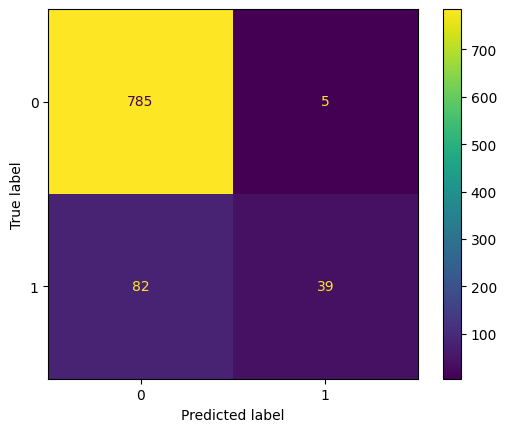

In [ ]:
knn_best_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 5 , weights = 'uniform')
knn_best_model.fit(Xk_train, yk_train)
predictions = knn_best_model.predict(Xk_test)
cm = confusion_matrix(yk_test, predictions, labels=knn_best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_best_model.classes_)
disp.plot()
plt.show()

At first glance an accuracy of $90$% looks promising - however, recalling the comment about the unbalanced nature of our dataset, it is only slightly better than the $86\%$ a random guesser would obtain. Nevertheless, compared to the confusion matrix of the random guesser, this slight difference is relevant in the sense our model is **learning something from the data** - with that being said, there's still the clear problem of the recall here; since our priority is to maximize it, having a recall of $32$% is awful - about two-third of the time a client churns, we're predicting he doesn't churn which is far from what we want. This low recall can be explained by the unbalanced fact - **KNN is biasing memorization towards the majority class so we end up with terrible results regarding the positive churn cases.**

### **4.2 Naive Bayes model**

For Naive Bayes there isn't any additional data preparation concern apart from the categorical variable encoding. The only notable thing to refer is that as we have both categorical and numerical explanatory variables, we had to use an implementation of **Mixed Naive Bayes**.

Regarding hyperparameter tuning, the only thing we could alter is the coefficient responsible for **Laplace Smoothing**. Now, since in this dataset, we don't have problems with null probability values, there's not any point in trying to tune it.

With that being said, we obtained the following metrics:

In [ ]:
mixed_nb = MixedNB(categorical_features=[1,2])

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall']

#this gives the accuracies of all folds made
cv_scores = sklearn.model_selection.cross_validate(mixed_nb, X , y , cv=kf, scoring=scoring)

print('accuracy =', np.mean(cv_scores['test_accuracy']) )
print('precision =', np.mean(cv_scores['test_precision']) )
print('recall =',np.mean(cv_scores['test_recall']) )

accuracy = 0.9079670329670331
precision = 0.7645971668779253
recall = 0.49022501478500746


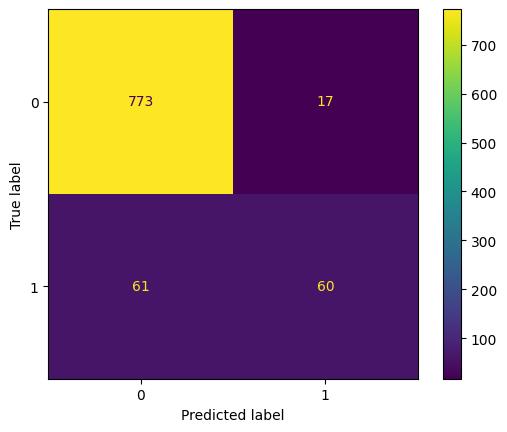

In [ ]:
mixed_nb = MixedNB(categorical_features=[1,2])
mixed_nb.fit(X_train, y_train)
predictions = mixed_nb.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=[0,1])
disp.plot()
plt.show()

We see a **similar accuracy to KNN**, which still emphasizes that our model is learning something from the data since it predicts **slightly better than a random classifier**. Compared to KNN, we see both an increase of $17\%$ in the recall and a decrease of $17\%$ in precision, which pretty explicitly highlights the usual **precision-recall trade-off**. Nevertheless, these metrics are still quite far from a satisfying result, as now we have an additional problem: not only do we have the concern of a majority class being biased, but we also have the huge assumption of class-independence which is far from being satisfied here - hence, *a priori* **we weren't expecting the best results when applying this model to our dataset.**

### **4.3 Decision Tree**

For the decision trees, we have a vast number of possible parameters that we can optimize. We'll briefly explain the ones that we think are more important to optimize. Firstly, the **ccp_alpha** is a parameter that regulates the amount of pruning that is made. The pruning on a decision tree is very important as it affects performance and potential overfitting. Another is the **max depth**, the more depth the tree has, the more complex it will tend to be. It is a good idea to regulate the depths so the tree doesn't become too complex (and so that we prevent overfitting). Now the **min sample in the leaf and the split** are self-explanatory - they help regulate the tree in the construction process so we don't have splits/leaves with a very low number of cases. The **criteria** to decide the best attribute to consider to make the splits, of course, is the heart of the algorithm and it's important to see which one performs the better.

Regarding transformations to the data, the implementation of the tree classifier in sklearn does the needed transformations before constructing the tree so we don't need to do it ourselves.

Moving on to the tuning, the hyperparameters considered on the grid were:

1.   ccp\_alpha = 0.0001
2.   criterion= 'entropy'
3.   max\_depth = 8
4.   min\_samples\_leaf = 10
5.   min\_samples\_split = 2

In [ ]:
param = {'ccp_alpha': [ 0.01, 0.001, 0.0005, 0.0001, 0],
         'random_state' : [42],
         'splitter' : ['best'],
         'min_samples_split' : [ 2, 7, 4,10, 100, ],
         'min_samples_leaf' : [1, 3, 7 ,10,  100 ],
         'criterion' : ['gini', 'entropy', 'log_loss' ],
         'max_depth' : [None, 3, 4, 5, 6 ,7 ,8 ,9 ,10 ]
}
#########
kf = KFold(n_splits=5, shuffle=True, random_state=42)

tree_model = DecisionTreeClassifier()

#GridSearchCV
grid_search = GridSearchCV( estimator=tree_model , param_grid=param, scoring=custom_scorer,n_jobs=5, verbose=1, cv =kf )
grid_search.fit(X, y)

print(grid_search.best_params_)

#{'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}

Fitting 5 folds for each of 3375 candidates, totalling 16875 fits


Giving the following results:

accuracy = 0.956730287256603
precision = 0.9116708392976065
recall = 0.7625034657358922


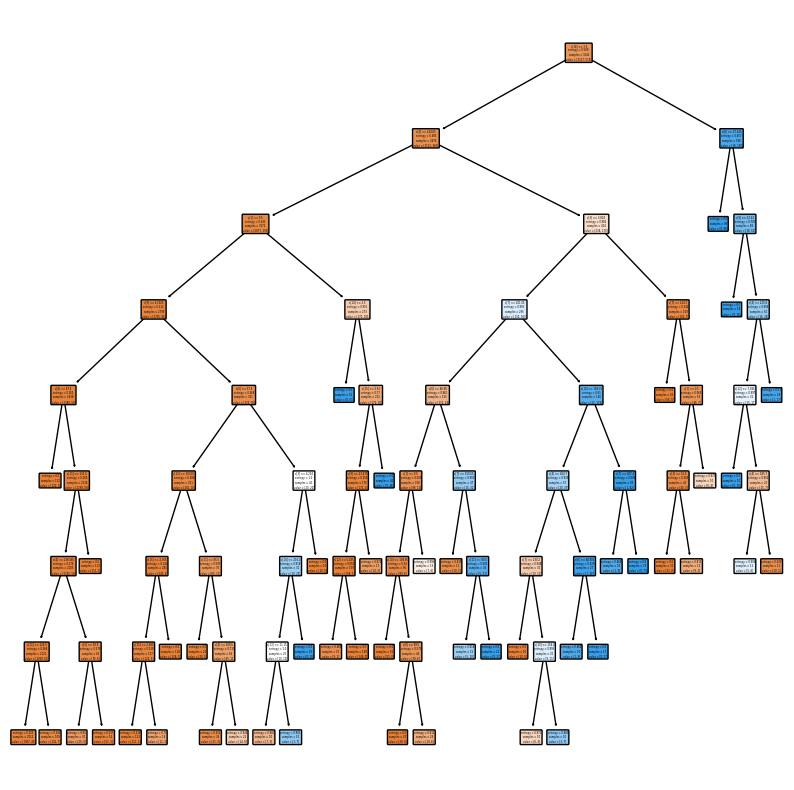

In [ ]:
#tree with optimal parameters
tree_model_best = DecisionTreeClassifier( ccp_alpha = 0.0001, criterion= 'entropy', max_depth = 8 , min_samples_leaf= 10 , min_samples_split= 2, random_state= 42, splitter= 'best' )

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall']

#this gives the accuracies of all folds made
cv_scores = sklearn.model_selection.cross_validate(tree_model_best, X , y , cv=kf, scoring=scoring)

print('accuracy =', np.mean(cv_scores['test_accuracy']) )
print('precision =', np.mean(cv_scores['test_precision']) )
print('recall =',np.mean(cv_scores['test_recall']) )

#we can vizualize the tree built trainig the model with the training set
tree_model_best.fit(X_train, y_train)
plt.figure(figsize=(10, 10))
plot_tree(tree_model_best, filled=True, rounded=True)
plt.show()

Firstly, regarding the parameters given by the GridSearch, the criterion, and minimum samples per leaf/split don't have much interpretation, however, the resulting ccp\_alpha and max\_depth obtained can be explained in the sense they gave the best compensation between letting the tree have enough complexity to capture some essence of the data while **preventing excessive overfitting and also resulting in loss of interpretability** (a big plus of decision trees).

This can be observed in the **plots obtained for the metrics in the function of the max\_depth**, for example:


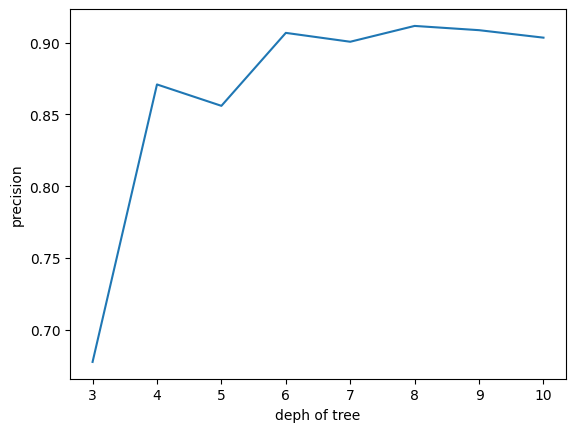

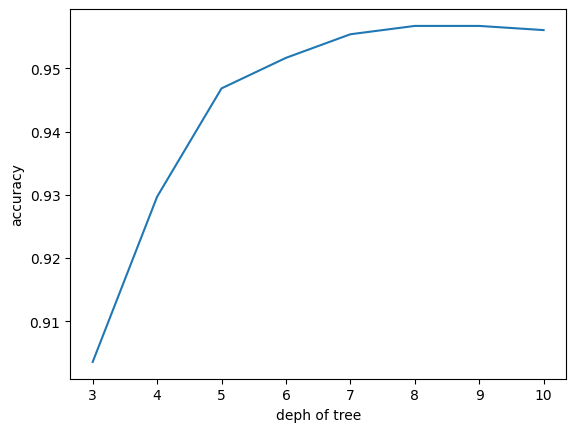

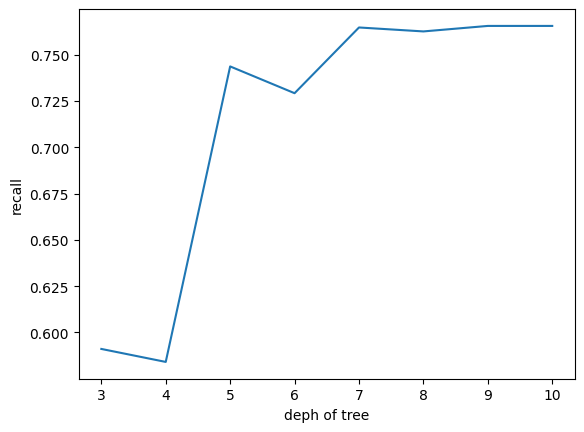

In [ ]:
precsion_list = []
accuracy_list = []
recall_list = []
deph_list = []

for i in range(3,11):
  model = DecisionTreeClassifier( ccp_alpha = 0.0001, criterion= 'entropy', max_depth = i , min_samples_leaf= 10 , min_samples_split= 2, random_state= 42, splitter= 'best' )
  model.fit(X_train, y_train)
  kf = KFold(n_splits=10, shuffle=True, random_state=42)
  cv_scores = sklearn.model_selection.cross_validate(model, X , y , cv=kf, scoring=scoring)
  precsion_list.append( np.mean(cv_scores['test_precision']) )
  accuracy_list.append( np.mean(cv_scores['test_accuracy']) )
  recall_list.append( np.mean(cv_scores['test_recall']) )
  deph_list.append(i)

plt.plot(deph_list, precsion_list )
plt.xlabel("deph of tree")
plt.ylabel("precision")
plt.show()

plt.plot(deph_list, accuracy_list )
plt.xlabel("deph of tree")
plt.ylabel("accuracy")
plt.show()

plt.plot(deph_list, recall_list )
plt.xlabel("deph of tree")
plt.ylabel("recall")
plt.show()


There's a clear positive trend for every metric in the function of max depth, however, as discussed this needs to be counterbalanced with the overfitting aspect.

Regarding the metrics obtained, these are considerably more interesting than the previous ones, in the sense that not only do we obtain an **accuracy of $10\%$ above a random guesser**, but also our model is mislabeling considerably less often - especially when considering our main priority: **recall**, here we're only mislabeling a churner 1 out of 4 times, which isn't too bad considering the unbalanced proportion of the dataset.

To address the **overfitting problem**, we create one final model considering the parameters tuned to give the best results while not sacrificing its ability to generalise towards unseen data:


accuracy = 0.9468507807981492
precision = 0.8560135351757383
recall = 0.7436154179593657


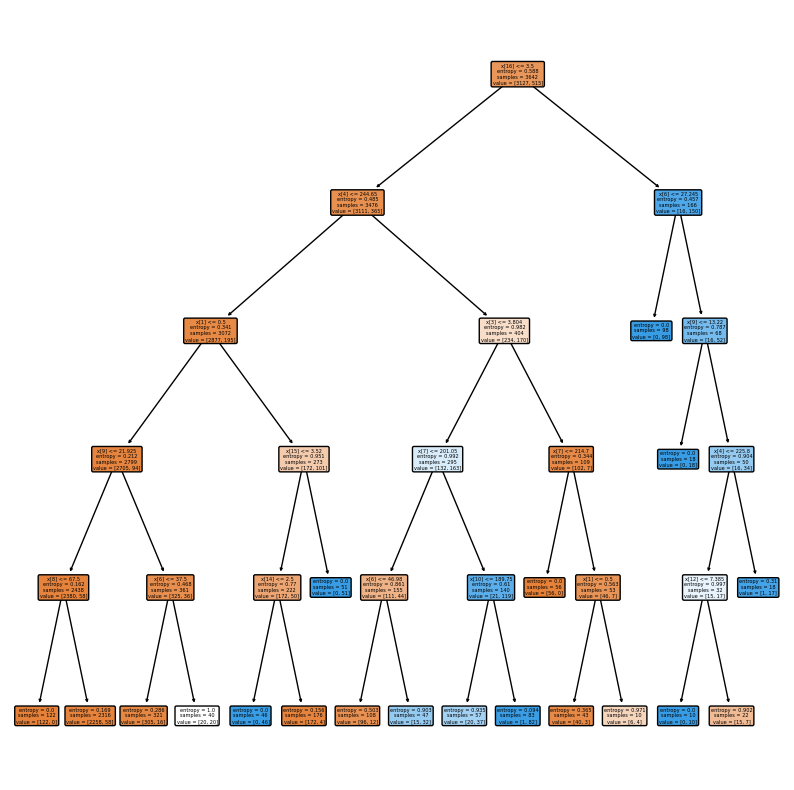

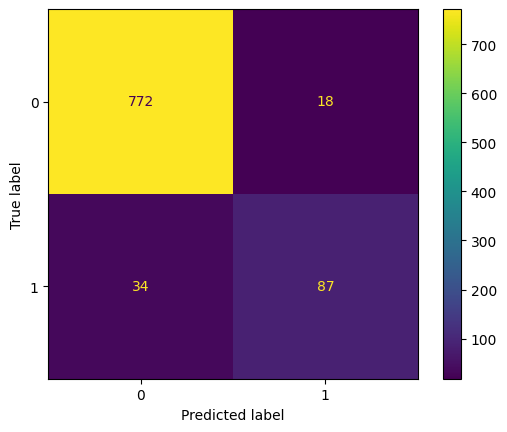

In [ ]:
#best performant model with lower complexity is 5, after we probably dealing with overfitting

tree_model_best = DecisionTreeClassifier( ccp_alpha = 0.0001, criterion= 'entropy', max_depth = 5 , min_samples_leaf= 10 , min_samples_split= 2, random_state= 42, splitter= 'best' )

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall']

# This gives the accuracies of all folds made
cv_scores = sklearn.model_selection.cross_validate(tree_model_best, X , y , cv=kf, scoring=scoring)

print('accuracy =', np.mean(cv_scores['test_accuracy']) )
print('precision =', np.mean(cv_scores['test_precision']) )
print('recall =',np.mean(cv_scores['test_recall']) )

#we can vizualize the tree built trainig the model with the training set
tree_model_best.fit(X_train, y_train)
plt.figure(figsize=(10, 10))
plot_tree(tree_model_best, filled=True, rounded=True)
plt.show()

predictions = tree_model_best.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=tree_model_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=tree_model_best.classes_)
disp.plot()
plt.show()

The main difference regarding the previous model is a decrease in precision, but even with this, we believe the model's increased ability to adapt to unseen data counterbalances this loss.

### **4.4 Tree Ensembles**

For the ensemble methods, we're going to specifically use the **random forest and gradient boost classifiers**; in comparison to decision trees, we'd expect these to perform slightly better as we can use a big number of lesser trained "base model decision trees" to give a final prediction **by considering the "vote" of each**. Another important key point here is the fact that each decision tree has a different set of features, which helps **minimise internal correlation**.


In [ ]:
df_ensemble = df_umbalanced.copy()

XE = df_ensemble.drop('churn', axis=1)
yE = df_ensemble['churn']

XE_train, XE_test, yE_train, yE_test = train_test_split(XE, yE, test_size=0.2, random_state=42)

Starting with the **Random Forest**, let's begin, as usual, by tuning its hyperparameters; the following parameters were considered:

Note that some parameters like the number of base models (**n\_estimators**), nr. of attributes considered by the base model (**max\_features**) and each model's max depth (**max\_depth**) have a similar interpretation as before - even though increasing it may lead to better metrics since we're capturing **more essence of the data**, it also inevitably leads to **overfitting problems** AND increased computational costs, so, again, it's crucial to cap these appropriately and find a **reasonable balance** between these problems. The gridsearch was performed over the following parameters:
  1. 'n\_estimators' $\in [250, 500, 1000, 1500]$
  2. 'max_features' $\in [3, 5, 8]$
  3. 'max_depth' $\in [3, 4, 5, 8]$

Having obtained:

In [ ]:
# def custom_scoring(y_true, y_pred):
#     precision = precision_score(y_true, y_pred)
#     accuracy = accuracy_score(y_true, y_pred)
#     recall = recall_score(y_true, y_pred)
#     score = 0.3 * precision + 0.3 * accuracy + 0.5 * recall
#     return score
# custom_scorer = make_scorer(custom_scoring, greater_is_better=True)

param = {'n_estimators': [250, 500, 1000, 1500], "max_features" : [3,5,8], 'max_depth' : [3,4,5,8], 'random_state': [42]}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

ensemble_model = RandomForestClassifier()

#GridSearchCV
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param, scoring=custom_scorer, n_jobs=5, verbose=1, cv=kf)
grid_search.fit(XE, yE)


print(grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 5, 'max_features': 8, 'n_estimators': 1000, 'random_state': 42}


Resulting in:

In [ ]:
te_model_best = RandomForestClassifier(n_estimators=1000, max_depth = 8, max_features = 8, random_state=42) #te -> tree ensembles
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall']

# This gives the accuracies of all folds made
cv_scores_te = sklearn.model_selection.cross_validate(te_model_best, XE , yE , cv=kf, scoring=scoring)

print('accuracy =', np.mean(cv_scores_te['test_accuracy']))
print('precision =', np.mean(cv_scores_te['test_precision']))
print('recall =',np.mean(cv_scores_te['test_recall']))


accuracy = 0.9631024957479404
precision = 0.9419839292349106
recall = 0.782237864175527


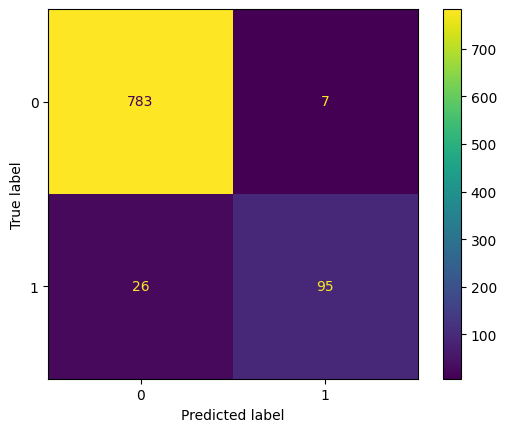

In [ ]:
te_model_best = RandomForestClassifier(n_estimators=1000, max_depth = 8, max_features = 8, random_state=42)

te_model_best.fit(XE_train, yE_train)
predictions = te_model_best.predict(XE_test)
cm = confusion_matrix(yE_test, predictions, labels=te_model_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=te_model_best.classes_)
disp.plot()
plt.show()


In comparison to Decision Trees, this confirms the initial statement that we'd obtain a slightly better result at the cost of losing **interpretability**.

___

Now moving to **gradient boosting**, in summary, this model aims to address some of the limitations of Random Forests by employing a boosting approach, building trees sequentially, and optimizing a loss function iteratively.

From our standpoint, it also has the advantage of having the nr. of base models (**n\_estimators**) and learning rate (**learning\_rate**) associated with the GB process as the only hyperparameters, allowing for easier tuning. Performing the gridsearch over:

  1. 'n\_estimators' $\in [250, 500, 1000]$
  2. 'learning_rate' $\in [0.5, 0.1, 0.05, 0.01]$

We then obtained:


In [ ]:
#BOOSTING
df_boost = df_umbalanced.copy()

Xg = df_ensemble.drop('churn', axis=1)
yg = df_ensemble['churn']

Xg_train, Xg_test, yg_train, yg_test = train_test_split(Xg, yg, test_size=0.2, random_state=42)

param = {'n_estimators': [250, 500, 1000], 'learning_rate': [0.5, 0.1, 0.05, 0.01], 'random_state' : [42]}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

boost_model = GradientBoostingClassifier()

#GridSearchCV
grid_search = GridSearchCV(estimator=boost_model, param_grid=param, scoring=custom_scorer, n_jobs=5, verbose=1, cv=kf)
grid_search.fit(Xg, yg)

print(grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'learning_rate': 0.05, 'n_estimators': 500, 'random_state': 42}


Which resulted in:

In [ ]:
b_model_best = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.05, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall']

#this gives the accuracies of all folds made
cv_scores_b = sklearn.model_selection.cross_validate(b_model_best, Xg , yg , cv=kf, scoring=scoring)

print('accuracy =', np.mean(cv_scores_b['test_accuracy']))
print('precision =', np.mean(cv_scores_b['test_precision']))
print('recall =',np.mean(cv_scores_b['test_recall']))

accuracy = 0.9633217934644938
precision = 0.9389708000329092
recall = 0.7869441918520144


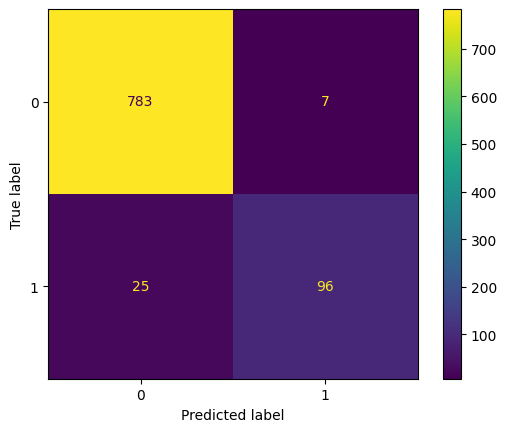

In [ ]:
b_model_best = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.05, random_state=42)

b_model_best.fit(Xg_train, yg_train)
predictions = b_model_best.predict(Xg_test)
cm = confusion_matrix(yg_test, predictions, labels=b_model_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=b_model_best.classes_)
disp.plot()
plt.show()

These results correspond to a slight improvement over the traditional Random Forest, and already a significant one relative to the original Decision Trees, which was more or less expected in the sense that GBMs **include techniques to fix some of the Random Forest's issues** (such as regularization, better handling of unbalanced data, etc.).

### **4.5 Support Vector Machines**

Regarding Support Vector Machines, our work would be simplified if the data turned out to be **linearly separable** - so let's start exactly by visualizing the 2-dimensional **PCA** decomposition of our data:

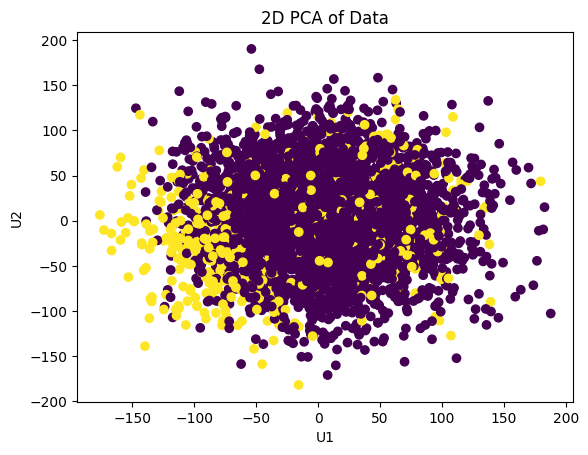

In [ ]:
#start by seeing if we have linearly separable data

from sklearn.decomposition import PCA

pcaDecomp = PCA(n_components = 2).fit_transform(XB) #combine every feature in 2 non-interpretable features, resulting of lcs

plt.scatter(pcaDecomp[:, 0], pcaDecomp[:, 1],c = yB)

plt.xlabel('U1') #linear combination of features 1
plt.ylabel('U2') #linear combination of features 2
plt.title('2D PCA of Data')
plt.show()

As we can see our data is **far from linearly separable**, so we need to consider **non-linear kernels** and **different values for the parameter $C$** (that quantifies the hardness of the classification margins). For the hyperparameter tuning, we chose the following grid:

Hence we chose the following parameters:

  1. 'kernel' $\in [$'rbf', 'poly'$]$
  2. $C \in [0.1,2, 4, 8, 10]$


In [ ]:
df_SVM = df_umbalanced.copy()

X_SVM = df_SVM.drop('churn', axis=1)
y_SVM = df_SVM['churn']

X_SVMtrain, X_SVMtest, y_SVMtrain, y_SVMtest = train_test_split(X_SVM, y_SVM, test_size=0.2, random_state=42)

param = {'kernel': ['rbf', 'poly','sigmoid'], 'C' : [0.1,2, 4, 8, 10], 'random_state': [42]}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

svm_model = SVC()

#GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param, scoring=custom_scorer, n_jobs=5, verbose=1, cv=kf)
grid_search.fit(X_SVM, y_SVM)

print(grid_search.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'C': 10, 'kernel': 'rbf', 'random_state': 42}


This resulted in:

In [ ]:
svm_model_best = SVC(kernel='rbf', C = 10, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall']

#this gives the accuracies of all folds made
cv_scores_SVM = sklearn.model_selection.cross_validate(svm_model_best, X_SVM , y_SVM , cv=kf, scoring=scoring)

print('accuracy =', np.mean(cv_scores_SVM['test_accuracy']))
print('precision =', np.mean(cv_scores_SVM['test_precision']))
print('recall =',np.mean(cv_scores_SVM['test_recall']))

accuracy = 0.8853485482684166
precision = 0.9262633917806333
recall = 0.19566614232071872


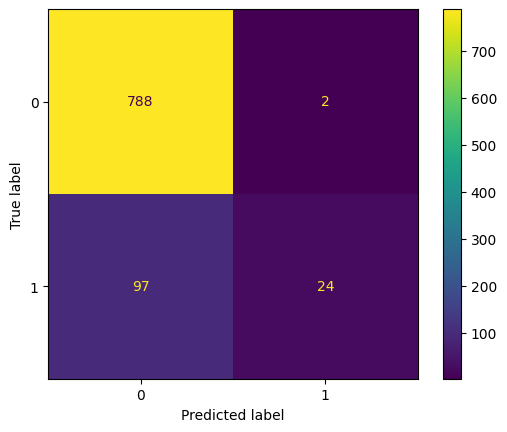

In [ ]:
b_model_best = SVC(kernel='rbf', C = 10, random_state=42)

b_model_best.fit(X_SVMtrain, y_SVMtrain)
predictions = b_model_best.predict(X_SVMtest)
cm = confusion_matrix(y_SVMtest, predictions, labels=b_model_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=b_model_best.classes_)
disp.plot()
plt.show()

Regarding the SVMs, we can see how **terrible** the model is performing for this dataset: even though we see the typical accuracy and recall decrease/increase respectively, the results are **far from good** - just by looking at the confusion matrix, we see we mislabeled more people as non-churners (that were churners) than labelled correctly churners. This is a sign that such a model **wouldn't be viable for deployment**.
This however isn't unexpected as **this model works best when targeted at linearly separable data** (we tried addressing this with different kernels, different values of $C$, but to no avail).

### **4.6 Neural Network**

In the neural network model we begin by talking about the needed transformations in data: the most important transformation that we can do (it is not mandatory) is to **normalize the data**. Neural networks are also sensible to the size of the values. If we normalize them we can potentially get better results, and also a **faster converging rate** to a decent result. For this matter, we decided to use a **standardisation**.

Talking now about the possible parameters that are more important to optimize. The first and most logical one is the **number of layers and their sizes**. A few layers with a low number of neurons **can't capture a lot of patterns on the data** so the results may be bad. On the other hand, making more layers and them bigger makes them capture more patterns, but can be a hyperparametrization that leads easily to **overfitting**. Knowing this we need to try to reach a **middle ground in size and number of neurons** (also of course the shapes of the layers are very important and can affect the performance, and going deeper, there are a lot of different layer types and architectures; But we will keep it simple and we will only use a type of layer that is implemented in the **MLPClassifier**). Another important one is the **activation function** used for the **hidden layers**, which can influence the model's behaviour a lot. However, for the sake of not making the testing too long, we will use the **relu activation function**, which is typically the one that gives the best results. The algorithm to **optimize the weights** is also relevant, not only influencing the performance but also the time it takes to converge. Nevertheless, again, **typically the best one is the adam optimizer**, which is the one we will use. The **learning rate** is the size of the step made at each iteration in the optimization algorithm. Lastly, the **l2 regularization term** basically helps prevent overfitting.

In [ ]:
#the transformation in the knn is the same of what we need there
df_neural = df_knn.copy()

X_neural = df_neural.drop('churn', axis=1)
y_neural = df_neural['churn']

In [ ]:
neural_model = MLPClassifier()

neural_param = {
    'hidden_layer_sizes': [(50), (200), (100,100), (100, 50), (200, 25) ],  #values for the hidden layer sizes (100, 50, 25), (100), (100, 25), (100, 25), (50, 20)
    'activation': ['relu'],  #chosen activation function
    'solver': ['adam'],  #optimization chosen for initial weights
    'alpha': [0.0001, 0.001, 0.01],  #values for L2 regularization term
    #'learning_rate': ['constant', 'adaptive', 'invscaling'],  #learning rate schedulers
    'learning_rate_init': [0.001, 0.01, 0.1],  # Example values for initial learning rate
   # 'power_t': [0.5, 0.8, 1.0],  #inverse scaling learning rate
    'max_iter': [400],  #values for the maximum number of iterations
   # 'shuffle': [True],  #shuffling training data
    'random_state': [42],  #random seed
   # 'tol': [1e-4, 1e-3, 1e-2],  #tolerance for optimization
    'verbose': [False],  #verbose
    'warm_start': [False],  #reusing the solution of the previous call to fit
   # 'momentum': [0.9, 0.95, 0.99],  #vals for momentum
   # 'nesterovs_momentum': [True],  #attempt with Nesterov's momentum
   # 'early_stopping': [True],  #using early stopping
   # 'validation_fraction': [0.1, 0.2, 0.3],  #fraction of training data for validation
   # 'beta_1': [0.8, 0.9, 0.95],  #exponential decay rate for the first moment vector
   # 'beta_2': [0.99, 0.999],  #exponential decay rate for the second moment vector
   # 'epsilon': [1e-8, 1e-7],  #numerical stability in adam
    'n_iter_no_change': [50],  #values for the maximum number of epochs with no improvement before early stopping
   # 'max_fun': [10000],  #values for the maximum number of function evaluations during optimization
}


kf = KFold(n_splits=5, shuffle=True, random_state=42)

neural_model = MLPClassifier()

#GridSearchCV
grid_search = GridSearchCV(estimator=neural_model, param_grid=neural_param, scoring=custom_scorer, n_jobs=5, verbose=1, cv=kf)
grid_search.fit(X_neural, y_neural)

print(grid_search.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (200, 25), 'learning_rate_init': 0.1, 'max_iter': 400, 'n_iter_no_change': 30, 'random_state': 42, 'solver': 'adam', 'verbose': False, 'warm_start': False}


In [ ]:
neural_model_best = MLPClassifier(hidden_layer_sizes=(200, 25),  #tuple representing the number of neurons in each hidden layer
    activation='relu',          #activation function for hidden layers ('relu', 'logistic', 'tanh', etc.)
    solver='adam',              #optimization algorithm ('adam', 'sgd', 'lbfgs')
    alpha=0.01,               #l2 regularization term
    learning_rate_init=0.1,    #initial learning rate
    max_iter=400,               #maximum number of iterations
    random_state=42,          #seed for random number generator
    verbose=False,              #whether to print progress messages
    n_iter_no_change=50,      #patience
)


kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall']

#accs of all folds made
cv_scores_b = sklearn.model_selection.cross_validate(neural_model_best, X_neural , y_neural , cv=kf, scoring=scoring)

print('accuracy =', np.mean(cv_scores_b['test_accuracy']))
print('precision =', np.mean(cv_scores_b['test_precision']))
print('recall =',np.mean(cv_scores_b['test_recall']))

accuracy = 0.9694720208441394
precision = 0.943159481429557
recall = 0.8314276148429339


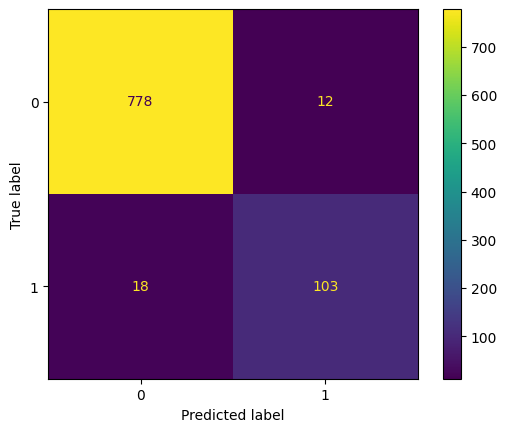

In [ ]:
neural_model_best = MLPClassifier(hidden_layer_sizes=(200, 25),
    activation='relu',
    solver='adam',
    alpha=0.01,
    learning_rate_init=0.1,
    max_iter=400,
    random_state=42,
    verbose=False,
    n_iter_no_change=50,
)

neural_model_best.fit(Xk_train, yk_train)
predictions = neural_model_best.predict(Xk_test)
cm = confusion_matrix(yk_test, predictions, labels=neural_model_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=neural_model_best.classes_)
disp.plot()
plt.show()

These metrics are **slightly better** than those of the standard set by the **gradient boosting model** so far, as we've reached quite some satisfactory metrics here: we're only missing about $3\%$ of our predictions, and we're mislabeling about $17\%$ of churners. Even though this result isn't perfect, this is quite a **good candidate for the best model**, as even though the hyperparameter tuning is potentially very costly, we're rewarded by a model that **only suffers from interpretability**, since after the initial tuning adapting it to new data is relatively easy, that is, **scability is, on paper, assured**, and performance wise as we can see it is pretty decent as well!

# Balanced Dataset Analysis

Now we will construct the models using the **balanced** dataset. There are some important points to keep in mind. The two datasets are not so different from each other, however, our **balanced one has less data** and, of course, is now **balanced**. These differences are big enough to justify that we do a new parameter tunning for every model, but given that we already explained it with the unbalanced data, we'll focus more on analysing the results. It's also noteworthy to point out that the **random guessing confusion matrix** here would be **purely random**, as the proportions are **$0.5 \cdot 0.5$** for each entry, and since the NO model performed that badly, there's no relevancy in making such a comparison.

### **4.1 K-Nearest Neighbours (KNN) model**

In [ ]:
#transformations referred above
from sklearn.preprocessing import StandardScaler
numerical_cols = ['numbervmailmessages', 'totaldayminutes', 'totaldaycharge', 'totaleveminutes', 'totalevecharge',
                'totalnightminutes', 'totalnightcharge', 'totalintlminutes', 'totalintlcharge', 'accountlength',
                'totaldaycalls', 'totalevecalls', 'totalnightcalls', 'totalintlcalls', 'numbercustomerservicecalls']

dfb_knn = df_balanced.copy()

scaler = StandardScaler()
dfb_knn[numerical_cols] = scaler.fit_transform(dfb_knn[numerical_cols])

#for the unbalanced
Xkb = dfb_knn.drop('churn', axis=1)
ykb = dfb_knn['churn']

Xkb_train, Xkb_test, ykb_train, ykb_test = train_test_split(Xkb, ykb, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'n_neighbors': [2,3, 4,5, 7, 10, 15, 20, 25, 30, 50, 100],
    'weights': ['uniform', 'distance'],  #weighting schemes
    'metric': ['euclidean', 'manhattan', 'nan_euclidean' ]  #distance metrics
}

custom_scorer = make_scorer(custom_scoring, greater_is_better=True)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

knn_model = KNeighborsClassifier()

#GridSearchCV
grid_search = GridSearchCV( estimator=knn_model , param_grid=param_grid, scoring=custom_scorer,n_jobs=5, verbose=1, cv =kf )
grid_search.fit(Xkb, ykb)

print(grid_search.best_params_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


In [ ]:
#create a model with the optimal parameters to see its actual performance
knn_best_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 10 , weights = 'distance')

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall']

#accs of all folds
cv_scores = sklearn.model_selection.cross_validate(knn_best_model, Xkb, ykb, cv=kf, scoring=scoring)

print('accuracy =', np.mean(cv_scores['test_accuracy']) )
print('precision =', np.mean(cv_scores['test_precision']) )
print('recall =',np.mean(cv_scores['test_recall']) )

accuracy = 0.8153112696850394
precision = 0.8813701123119715
recall = 0.7295773754462564


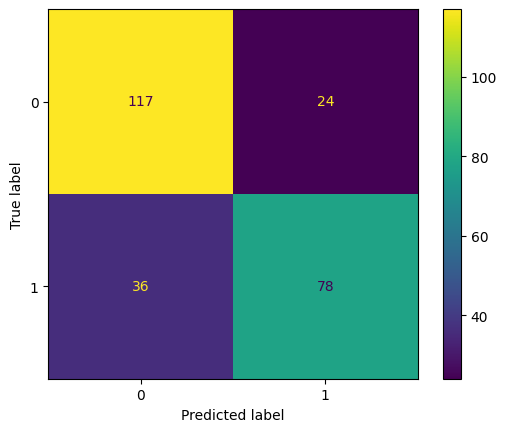

In [ ]:
knn_best_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 10 , weights = 'distance')
knn_best_model.fit(Xkb_train, ykb_train)
predictions = knn_best_model.predict(Xkb_test)
cm = confusion_matrix(ykb_test, predictions, labels=knn_best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_best_model.classes_)
disp.plot()
plt.show()

In the end, after the grid search, we got the following results for the metrics:


 - accuracy = 0.815
 - precision = 0.881
 - recall = 0.730



The results at first glance don't seem very promising compared to the model made with the unbalanced dataset. But let's analyze it in parts. First, **the precision is similar** (a little worse but nothing substantial). Next, we have **the accuracy that seems almost 10\% worse**. But now remember that before a **random guessing model** with the proportions of the churn or not churn would have a precision of (in average) 86\%, now it would have only 50\%, so it's obvious that this lower accuracy **in reality means a better accuracy** (in the sense the other was really misleading). Now, as we can see the **recall is much bigger** which leads to the conclusion that with the KNN, **the balanced dataset gives better results** (also comparing the confusion matrix we can see a very big decrease in the proportion of the miss classifications of the false negatives).

It's also interesting to note that now the **optimal parameters** found were considering 10 neighbours and the Manhattan distance. For the number of neighbours we can interpret that **with a more balanced dataset**, we need a **better average of the classifications of the neighbours** to get better results. Now the Manhattan instead of the Euclidean is not as clear why, probably just because of the specific sample.


### **4.2 Naive Bayes model**

In [ ]:
mixed_nb = MixedNB(categorical_features=[1,2])

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall']

#accs of folds
cv_scores = sklearn.model_selection.cross_validate(mixed_nb, Xb , yb , cv=kf, scoring=scoring)

print('accuracy =', np.mean(cv_scores['test_accuracy']) )
print('precision =', np.mean(cv_scores['test_precision']) )
print('recall =',np.mean(cv_scores['test_recall']) )

accuracy = 0.8019192913385828
precision = 0.7907224345202949
recall = 0.8214038766119842


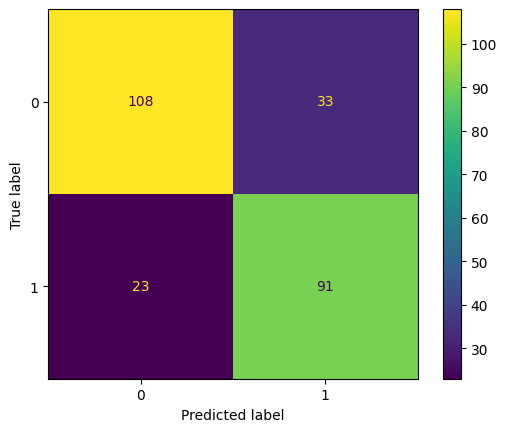

In [ ]:
mixed_nb = MixedNB(categorical_features=[1,2])
mixed_nb.fit(Xb_train, yb_train)
predictions = mixed_nb.predict(Xb_test)
cm = confusion_matrix(yb_test, predictions, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=[0,1])
disp.plot()
plt.show()

The results are:


- accuracy = 0.80
- precision = 0.79
- recall = 0.82


Here we see a similar pattern of the KNN: an **overall increase in the quality of the metrics**. We got **better precision**, **much better recall** and **simbolically better accuracy** (specifically the difference of misclassifications in proportion is much lower in the confusion matrix). Even though this accuracy is lower, it has **more meaning** than the previous ones, as there's **no bias in the dataset**. Also, by using a balanced dataset our custom scoring prioritizing recall has now a **clear effect**, as we encounter for the first time the **recall as the superior metric**. This all serves as evidence that using a balanced dataset is beneficial in this case.

### **4.3 Decision Tree**

In [ ]:
param = {'ccp_alpha': [ 0.01,0.005, 0.001, 0.0005, 0.0001, 0],
         'random_state' : [42],
         'splitter' : ['best'],
         'min_samples_split' : [ 2, 7, 4,10, 30, 70, 100, ],
         'min_samples_leaf' : [1, 3, 7 ,10, 30, 70,  100 ],
         'criterion' : ['gini', 'entropy', 'log_loss' ],
         'max_depth' : [None, 3, 4, 5, 6 ,7 ,8 ,9 ,10 ]
}
#########

kf = KFold(n_splits=5, shuffle=True, random_state=42)

tree_model = DecisionTreeClassifier()

#GridSearchCV
grid_search = GridSearchCV( estimator=tree_model , param_grid=param, scoring=custom_scorer,n_jobs=5, verbose=1, cv =kf )
grid_search.fit(Xb, yb)

print(grid_search.best_params_)

Fitting 5 folds for each of 7938 candidates, totalling 39690 fits
{'ccp_alpha': 0.005, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 30, 'random_state': 42, 'splitter': 'best'}


accuracy = 0.872613188976378
precision = 0.9350198141952706
recall = 0.8027224803863262


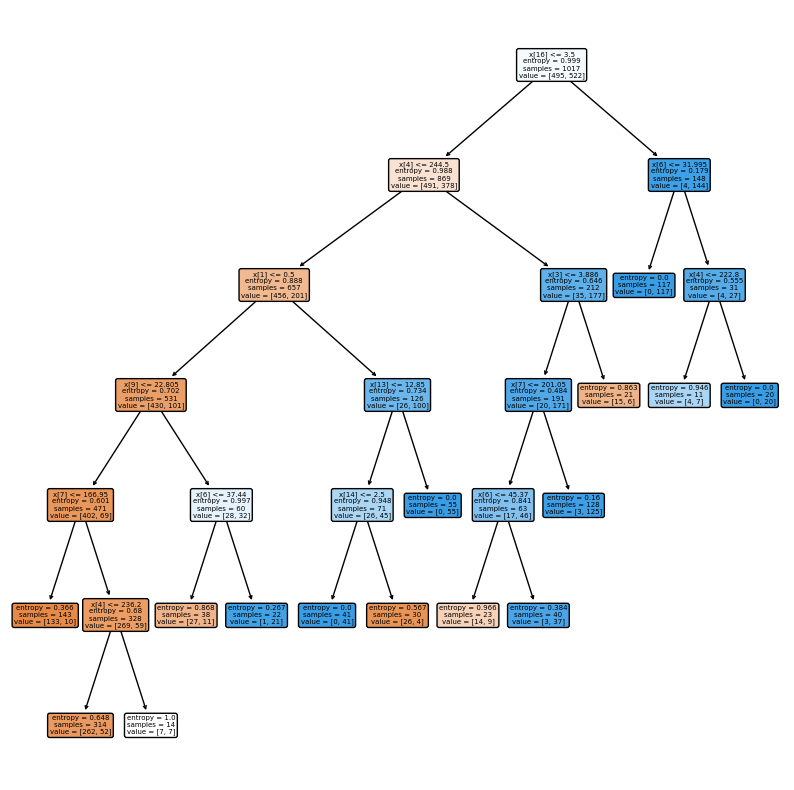

In [ ]:
#tree with optimal parameters
tree_model_best = DecisionTreeClassifier( ccp_alpha = 0.005, criterion= 'entropy', max_depth = 8 , min_samples_leaf= 10 , min_samples_split= 30, random_state= 42, splitter= 'best' )

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall']

#accs of folds
cv_scores = sklearn.model_selection.cross_validate(tree_model_best, Xb , yb , cv=kf, scoring=scoring)

print('accuracy =', np.mean(cv_scores['test_accuracy']) )
print('precision =', np.mean(cv_scores['test_precision']) )
print('recall =',np.mean(cv_scores['test_recall']) )


#visualize trained tree
tree_model_best.fit(Xb_train, yb_train)
plt.figure(figsize=(10, 10))
plot_tree(tree_model_best, filled=True, rounded=True)
plt.show()

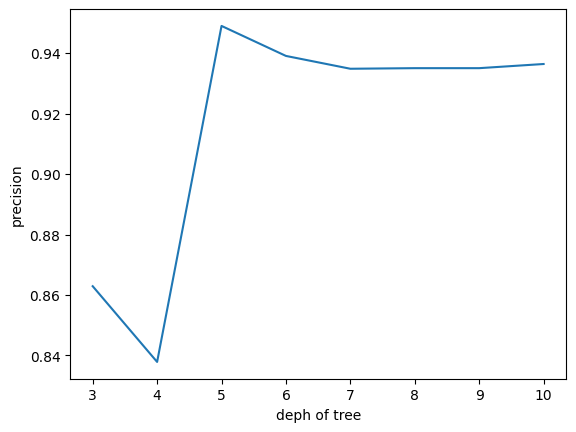

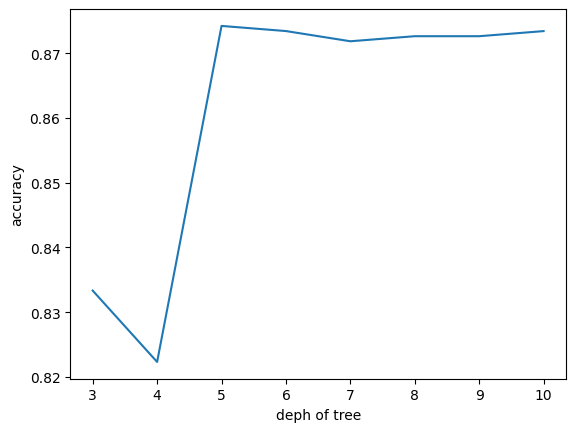

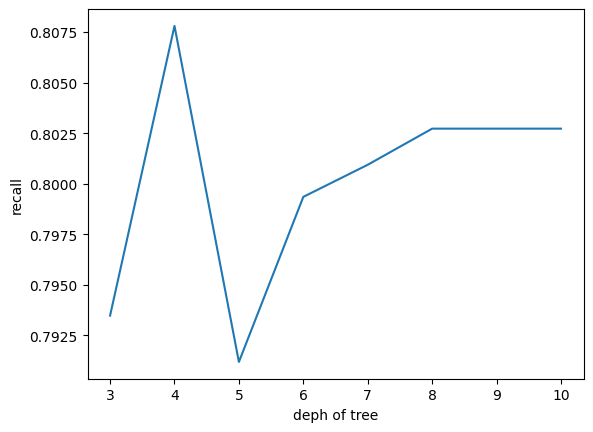

In [ ]:
precsion_list = []
accuracy_list = []
recall_list = []
deph_list = []

for i in range(3,11):
  model = DecisionTreeClassifier( ccp_alpha = 0.005, criterion= 'entropy', max_depth = i , min_samples_leaf= 10 , min_samples_split= 30, random_state= 42, splitter= 'best' )
  model.fit(Xb_train, yb_train)
  kf = KFold(n_splits=10, shuffle=True, random_state=42)
  cv_scores = sklearn.model_selection.cross_validate(model, Xb , yb , cv=kf, scoring=scoring)
  precsion_list.append( np.mean(cv_scores['test_precision']) )
  accuracy_list.append( np.mean(cv_scores['test_accuracy']) )
  recall_list.append( np.mean(cv_scores['test_recall']) )
  deph_list.append(i)

plt.plot(deph_list, precsion_list )
plt.xlabel("deph of tree")
plt.ylabel("precision")
plt.show()

plt.plot(deph_list, accuracy_list )
plt.xlabel("deph of tree")
plt.ylabel("accuracy")
plt.show()

plt.plot(deph_list, recall_list )
plt.xlabel("deph of tree")
plt.ylabel("recall")
plt.show()

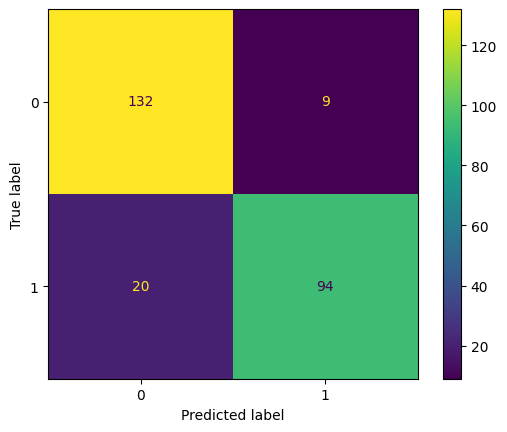

In [ ]:
tree_model_best = DecisionTreeClassifier( ccp_alpha = 0.005, criterion= 'entropy', max_depth = 8 , min_samples_leaf= 10 , min_samples_split= 30, random_state= 42, splitter= 'best' )

tree_model_best.fit(Xb_train, yb_train)
predictions = tree_model_best.predict(Xb_test)
cm = confusion_matrix(yb_test, predictions, labels=tree_model_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=tree_model_best.classes_)
disp.plot()
plt.show()


The final fine-tuned tree has the following metrics:

- accuracy = 0.87
- precision = 0.93
- recall = 0.80

with the parameters:

✔ ccp\_alpha = 0.005

✔ criterion= 'entropy'

✔ max\_depth = 8

✔ min\_samples\_leaf= 10

✔ min\_samples\_split= 30


We can see that the parameters are in general very similar to the tree using unbalanced data. In terms of the performance of the model, we see a similar pattern to the previous models. A **lower accuracy**, but in proportion means a more accurate model than before, a **lower precision** (but again this is the least significative metric), and a **slightly bigger recall**. In this model, we also see an improvement but is not so significant.
Also, we plotted the metrics in function to the depth to see if has a better model in terms of **complexity vs performance** and we found out that the **precision and accuracy stabilized around depth 5, but the recall only later at around 8, so we chose 8 as the ideal depth**.

This can be interpreted in the sense that the decision tree is, to a certain degree, **robust to bias in the data**, which is seen here by obtaining similar metrics.


### **4.4 Tree Ensembles**

In [ ]:
dfb_ensemble = df_balanced.copy()

XEb = dfb_ensemble.drop('churn', axis=1)
yEb = dfb_ensemble['churn']

XEb_train, XEb_test, yEb_train, yEb_test = train_test_split(XEb, yEb, test_size=0.2, random_state=42)

In [ ]:
param = {'n_estimators': [250, 500, 1000, 1500], "max_features" : [3,5,8], 'max_depth' : [3,4,5,8], 'random_state': [42]}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

ensemble_model = RandomForestClassifier()

#GridSearchCV
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param, scoring=custom_scorer, n_jobs=5, verbose=1, cv=kf)
grid_search.fit(XEb, yEb)

print(grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'max_depth': 8, 'max_features': 8, 'n_estimators': 1000, 'random_state': 42}


In [ ]:
te_model_best = RandomForestClassifier(n_estimators=1000, max_depth = 8, max_features = 8, random_state=42) #te -> tree ensembles
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall']

#accs of all folds
cv_scores_te = sklearn.model_selection.cross_validate(te_model_best, XEb , yEb , cv=kf, scoring=scoring)

print('accuracy =', np.mean(cv_scores_te['test_accuracy']))
print('precision =', np.mean(cv_scores_te['test_precision']))
print('recall =',np.mean(cv_scores_te['test_recall']))

accuracy = 0.8962297359888838
precision = 0.9383239219857188
recall = 0.84823743415839


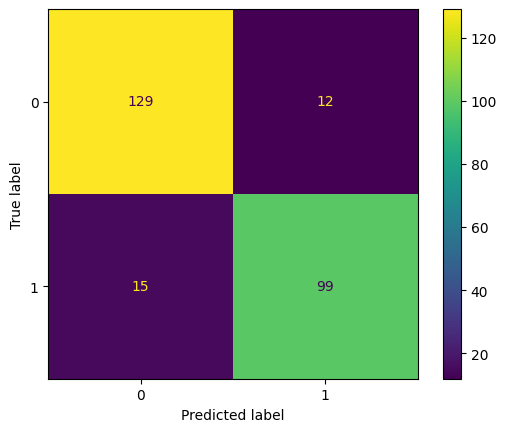

In [ ]:
te_model_best = RandomForestClassifier(n_estimators=1000, max_depth = 8, max_features = 8, random_state=42)

te_model_best.fit(XEb_train, yEb_train)
predictions = te_model_best.predict(XEb_test)
cm = confusion_matrix(yEb_test, predictions, labels=te_model_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=te_model_best.classes_)
disp.plot()
plt.show()

Regarding the ensembles, just as before we can see by the metrics these are performing **quite well**: A $90\%$ accuracy backed up by a $94\%$ and $85\%$ precision and recall, respectively, considering they were obtained from an **unbiased dataset**. Compared to the unbalanced one, we got a $6\%$ decrease in accuracy, which is to be expected, again, due to not having any bias here, a similar precision and, most importantly, a significant $7%$ boost in the recall. Much like before we see **this model slightly outperforming the "standalone model" for a decision tree.**

In [ ]:
df_boostb = df_balanced.copy()

Xgb = df_boostb.drop('churn', axis=1)
ygb = df_boostb['churn']

Xgb_train, Xgb_test, ygb_train, ygb_test = train_test_split(Xgb, ygb, test_size=0.2, random_state=42)

In [ ]:
param = {'n_estimators': [250, 500, 1000], 'learning_rate': [0.5, 0.1, 0.05, 0.01], 'random_state' : [42]}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

boost_model = GradientBoostingClassifier()

#GridSearchCV
grid_search = GridSearchCV(estimator=boost_model, param_grid=param, scoring=custom_scorer, n_jobs=5, verbose=1, cv=kf)
grid_search.fit(Xgb, ygb)


print(grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'learning_rate': 0.01, 'n_estimators': 1000, 'random_state': 42}


In [ ]:
b_model_best = GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.01, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall']

#accs of all folds
cv_scores_b = sklearn.model_selection.cross_validate(b_model_best, Xgb , ygb , cv=kf, scoring=scoring)

print('accuracy =', np.mean(cv_scores_b['test_accuracy']))
print('precision =', np.mean(cv_scores_b['test_precision']))
print('recall =',np.mean(cv_scores_b['test_recall']))

accuracy = 0.8844403273120273
precision = 0.908321329524108
recall = 0.8570016649524584


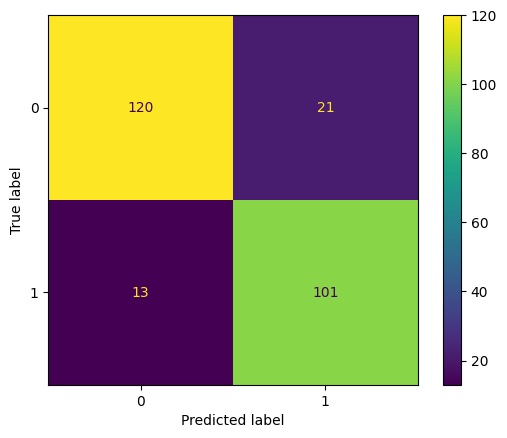

In [ ]:
b_model_best = GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.01, random_state=42)

b_model_best.fit(Xkb_train, ykb_train)
predictions = b_model_best.predict(Xkb_test)
cm = confusion_matrix(ykb_test, predictions, labels=b_model_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=b_model_best.classes_)
disp.plot()
plt.show()

Modelling the balanced data with the GBM we find an interesting result: we're getting **slightly worse results in comparison to traditional ensembles**. This might be associated with the fact GBMs **filter bias by themselves** and **require more data** for the gradient boosting method (with a specific learning rate) to be able to converge. Apart from this, comparing to the previous model we see the usual slight decrease in accuracy accompanied by a boost in recall.

### **4.5 Support Vector Machines**

In [ ]:
dfB_SVM = df_balanced.copy()

XB_SVM = dfB_SVM.drop('churn', axis=1)
yB_SVM = dfB_SVM['churn']

XB_SVMtrain, XB_SVMtest, yB_SVMtrain, yB_SVMtest = train_test_split(XB_SVM, yB_SVM, test_size=0.2, random_state=42)
#still need to do similar grid-search approach (here it might be too heavy though, perhaps we should consider a restriction of the dataset [also with balancing, etc.])
param = {'kernel': ['rbf', 'poly','sigmoid'], 'C' : [0.1,2, 4, 8, 10], 'random_state': [42]}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

svm_model = SVC()

#GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param, scoring=custom_scorer, n_jobs=5, verbose=1, cv=kf)
grid_search.fit(XB_SVM, yB_SVM)

print(grid_search.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'C': 10, 'kernel': 'rbf', 'random_state': 42}


In [ ]:
svm_model_best = SVC(kernel='rbf', C = 10, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall']

#accs of all folds
cv_scores_SVM = sklearn.model_selection.cross_validate(svm_model_best, XB_SVM , yB_SVM , cv=kf, scoring=scoring)

print('accuracy =', np.mean(cv_scores_SVM['test_accuracy']))
print('precision =', np.mean(cv_scores_SVM['test_precision']))
print('recall =',np.mean(cv_scores_SVM['test_recall']))

accuracy = 0.6910236220472441
precision = 0.8351035305770267
recall = 0.4772954748124958


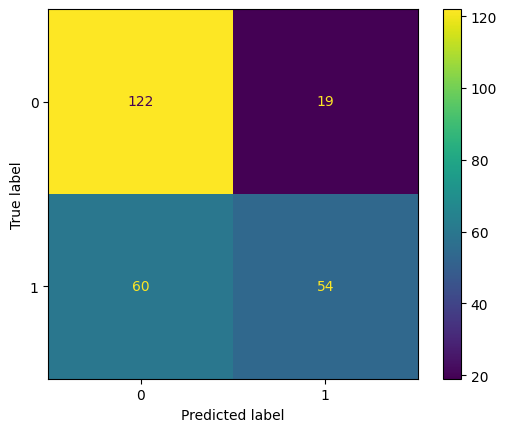

In [ ]:
bb_model_best = SVC(kernel='rbf', C = 10, random_state=42)

bb_model_best.fit(XB_SVMtrain, yB_SVMtrain)
predictions = b_model_best.predict(XB_SVMtest)
cm = confusion_matrix(yB_SVMtest, predictions, labels=bb_model_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=bb_model_best.classes_)
disp.plot()
plt.show()

Regarding the SVMs, we can see how **terrible** the model is performing for this dataset: even though we see the typical accuracy and recall decrease/increase respectively, the results are, again, **far from good** - even though the metrics have improved slightly they are still far from comparable to the others, which leads us to conclude this model **wouldn't be viable for deployment in this situation.**

### **4.6 Neural Network**

In [ ]:
#the transformation in the knn is the same of what we need there
dfb_neural = dfb_knn.copy()
Xb_neural = dfb_neural.drop('churn', axis=1)
yb_neural = dfb_neural['churn']

In [ ]:
neural_model = MLPClassifier()


neural_param = {
    'hidden_layer_sizes': [(300), (300, 50), (200), (200, 20), (200, 50) ],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [400],
    'random_state': [42],
    'verbose': [False],
    'warm_start': [False],
    'n_iter_no_change': [40]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

neural_model = MLPClassifier()

#GridSearchCV
grid_search = GridSearchCV( estimator=neural_model , param_grid=neural_param, scoring=custom_scorer,n_jobs=5, verbose=1, cv =kf )
grid_search.fit(Xb_neural, yb_neural)

print(grid_search.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (200, 20), 'learning_rate_init': 0.1, 'max_iter': 400, 'n_iter_no_change': 40, 'random_state': 42, 'solver': 'adam', 'verbose': False, 'warm_start': False}


In [ ]:
neural_model_best = MLPClassifier(hidden_layer_sizes=(200, 20),
    activation='relu',
    solver='adam',
    alpha=0.01,
    learning_rate_init=0.1,
    max_iter=400,
    random_state=42,
    verbose=False,
    n_iter_no_change=40,
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall']

#accs of all folds made
cv_scores_b = sklearn.model_selection.cross_validate(neural_model_best, Xb_neural , yb_neural , cv=kf, scoring=scoring)

print('accuracy =', np.mean(cv_scores_b['test_accuracy']))
print('precision =', np.mean(cv_scores_b['test_precision']))
print('recall =',np.mean(cv_scores_b['test_recall']))

accuracy = 0.8796973907673307
precision = 0.9138489184284282
recall = 0.8396526101690212


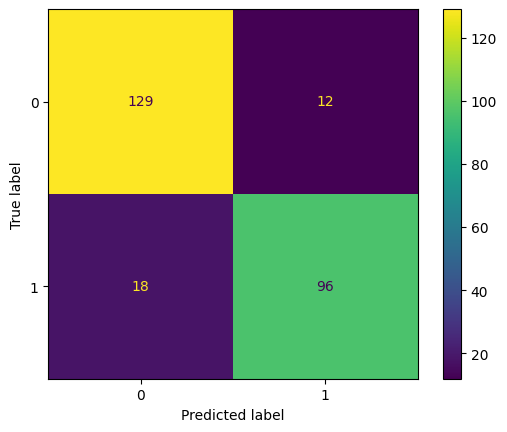

In [ ]:
neural_model_best = MLPClassifier(hidden_layer_sizes=(200, 20),
    activation='relu',
    solver='adam',
    alpha=0.01,
    learning_rate_init=0.1,
    max_iter=400,
    random_state=43,
    verbose=False,
    n_iter_no_change=40,
)

neural_model_best.fit(Xkb_train, ykb_train)
predictions = neural_model_best.predict(Xkb_test)
cm = confusion_matrix(ykb_test, predictions, labels=neural_model_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=neural_model_best.classes_)
disp.plot()
plt.show()

Now regarding the neural network, for the best parameters found **there isn't any significant differences**. Talking about performance with the balanced or unbalanced dataset, it also seems there is not much difference (maybe it's even a little worse with the balanced one). At first glance this seems strange, but in reality what is happening is that **we have less data in the balanced dataset**, and its known neural networks need a **good amount of data to converge to a good result**. With this less data, but balanced data resulted in similar performance. Probably with a bigger balanced set, **we should have better results**.

___

In the end, we see that working with a balanced dataset **results in better performance of the models in the overall scenarios**. The problem is that in our approach the balanced data has much fewer points than the original one. This means that the models that need more data to converge **don't have a significant increase in performance**. Our approach there was **not ideal**. We could for example sample points of the class of clients that churn, so we could **minimize this problem of less data** (of course the points generated are not so good but probably should be enough to feel a bigger increase in performance of the more data ungry models).

## Mean result aproach

At first glance, the **best constructed model is the neural network followed by the gradient Boosting** (at least in terms of performance, after this there will be a better summary and discussion of what is the actual best model). Knowing this, in the last analysis we only used individual models and analysed their results. But we can also take some models and take a single result out of them. For example, **making the mean of the results**. For this approach, we decided to just construct a model that is just the **average of the results of the previous two best performers models**. The neural network and the gradient boosting using the balanced dataset.

In [ ]:
boost_pred = b_model_best.predict(Xkb_test)
neural_pred = neural_model_best.predict(Xkb_test)

mean_pred_not_rouded  = (boost_pred+neural_pred)/2
mean_pred = np.round(mean_pred_not_rouded)

precision = precision_score(ykb_test, mean_pred)
recall = recall_score(ykb_test, mean_pred)
accuracy = accuracy_score(ykb_test, mean_pred)

print('accuracy =', accuracy)
print('precision =', precision )
print('recall =', recall)

accuracy = 0.9019607843137255
precision = 0.9405940594059405
recall = 0.8333333333333334


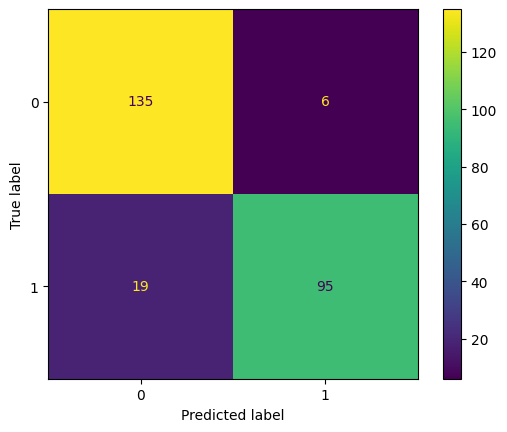

In [ ]:
cm = confusion_matrix(ykb_test, mean_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=[0,1])
disp.plot()
plt.show()

With this quick analysis, we see that we get a model with **similar performance as the other two** (maybe with a little better metrics, but the testing made is not very conclusive). So it can be a good option in terms of **raw performance that we combine two models** (or even more) as we can see. The problem is that the gain in performance (if there is one) **doesn't justify the use of two different models to get results**. Instead of training and optimizing a model we need to make it two or more times, which means more resources and more time needed to get similar results, we can simply put a little more effort into optimizing one of the models, and in the end, we probably get **similar performance utilizing least resources and less complexity** (at least if we talk about combining complex models, if the only option we have is to use more simple models it can be worth it, just by looking at the performance of the boosting, that in the end is just a combination of simple trees). Another thing is that we can't guarantee that we get a performance boost: we can see that in our example the **precision and accuracy increased**, but **the recall decreased compared to the recals of the other two models**.

## Result Summary

Now that we finished implementing and constructing the models and got some results there is an overall summary of the results, so we can better put in perspective the results (in the form of the metrics) we got and **finally reach some conclusions**:

|                    | KNN                      | Naive Bayess             | Tree                     | Random Florest           | Gradient Boosting        | SVM                      | NN                       | Avarage model            |
|--------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| Unbalanced Data    | <font size="3">A - 0.90<br>P - 0.93<br>R - 0.32</font> | <font size="3">A - 0.91<br>P - 0.76<br>R - 0.49</font> | <font size="3">A - 0.94<br>P - 0.86<br>R - 0.74</font> | <font size="3">A - 0.96<br>P - 0.95<br>R - 0.78</font> | <font size="3">A - 0.96<br>P - 0.94<br>R - 0.79</font> | <font size="3">A - 0.88<br>P - 0.92<br>R - 0.20</font> | <font size="3">A - 0.97<br>P - 0.94<br>R - 0.83</font> | <font size="3">-</font>  |
| Balanced Data      | <font size="3">A - 0.81<br>P - 0.88<br>R - 0.73</font> | <font size="3">A - 0.80<br>P - 0.79<br>R - 0.82</font> | <font size="3">A - 0.87<br>P - 0.93<br>R - 0.80</font> | <font size="3">A - 0.90<br>P - 0.94<br>R - 0.85</font> | <font size="3">A - 0.88<br>P - 0.90<br>R - 0.86</font> | <font size="3">A - 0.69<br>P - 0.84<br>R - 0.48</font> | <font size="3">A - 0.88<br>P - 0.91<br>R - 0.84</font> | <font size="3">A - 0.90<br>P - 0.94<br>R - 0.83</font> |

with:

R ➡ Recall

P ➡ Precision

A ➡ Accuracy


## Deciding the best model

To decide which model is the best we need to have in mind a variety of factors:

- Overall performance of the model - whether or not it predicts with great accuracy what we need to predict;

- Interpretability - to see if we actually can understand how the model makes the predictions;

- How easy is the model to deploy and its stability;

- Resource required to construct and operate.



**KNN**

Performace wise applying KNN just wasn't ideal - it had a very low recall using the unbalanced dataset, and while using the balanced one lead to a good improvement, it is still significantly behind the others. This means it misclassifies alot of churning clients as non-churners comparing to the other methods, which definitely goes against business' objective. In terms of the other factors it is actually not that bad. It's very easy to understand what the model is doing (just picks the class based on the neighbours) but in terms of actual knowledge to take from it, there isn't much to conclude. In terms of resources it is a very simple model to construct, and applying it to our dataset was both easy and not expensive, as we only had a small set of important parameters to optimize. In terms of deployability and scalability, giving the simplicity of the model, it was quite simple to deploy here but may had revealed some problems had the dataset been bigger. There's really no specific infrastucture needed.

In the end it's not really the best choice given that we have other simple models both in performance and metric wise.
___

**Naive Bayes**

In terms of performance it is on par with KNN (worst accuracy and precision but better recall). In terms of interpretabillity, this model is actually backed up by probability theory, so we can use it to extract coherent probability relations between all the variables. The problem is that as the name says it's naive: it assumes that all the attributes are independent, which isn't the case at all here. Hence it is better in the terms of explaining what is happening in comparison to the KNN, but it is still not a very satisfying explanation. In terms of the resources needed to make and operate, these are very minimal, even better than the KNN as we had no parameters to optimize (there were no features with null probability values), so in the end it was very easy to deploy and scale.

In the end it is not the best choice for a reasosn to that of the KNN.

___
**Decision Tree**


In terms of performance it is definitely better that the previous ones, having an increase also when we consider the balanced dataset (where we can see that is actually close in performance to the more complex models in our analysis). In term of interpretabillity this model is the overall best. To understand it's results the person doesn't need any type of background (not even in probabilities like the Naive Bayes), making it the overall best choice if it is very important for the business to undestand the mechanism behind the results. Now the problem is that decision trees are very sensible to the training data, so the substancial meaning behind the models can be dubious. In terms of the resources required, it is a very light model to train and use, having only some more important parameters to optimize comparing to those of models before. Giving its light and simple nature in the end makes it quite easy to deploy and eventually scale if neded.

It is by no means the ideal model, but, among all models, it's the one with overall best compromise between simplicity, interpretability and performance.
___
**Random florest and Gradient Boosting**

In a nutshell, this model is somewhat similar to the decision trees, with a trade off between better performance and both worst explainability and need of more resources. The performance was better than that of the decision tree, especially on the unbalanced seting, because as it was already explained, it needs more data for better results. In term of explainability there is not much to take from the model because in the end is the average of the results of a collection of decision trees. In terms of the resources needed it starts to be in different step comparing to the previous models. It needs a substancial more parameters to optimize and overall the model is more complex. Considering our dataset it isn't very difficult to deploy but if we were working with a much larger amount of data it would be much more difficult to build and deploy, so in retrospect, because of it's nature, it's scalability is not very good because with more data we would practically need to build a new model from scratch. In our case though, it was quite easy to deploy and it didn't need alot of resources.

In conclusion, overall a good candidate for the best model, but with clear drawbacks.

___
**SVM**

Everything about the SVM in the context of our work points out that is not a good model for our objective. The only point we'd have in favour of using it would be having a binary target variable, but even with this our data is, as we saw, far from being linearly separate, which lead to bad performance (even comparing with the simpler models like the decision tree). On top of this there isn't any real explainability related and the resources to build the model are expensive (the time complexity is AT LEAST quadratic with the number of data points).

Overall this meant poor performance for alot of resources: not a good model choice, for our case.
___
**Neural Network**

The neural network implemented is just a **MLPCLASSIFIER**, one of the simple implementations of a NN, it can take a form of an infinity of different models: we can consider different types of nodes, layers, or even all around architectures, so it is very important to keep this in mind before analysing it. Overall it had a good performance. Better than the RF and GBM in the unbalanced dataset, and equal/lower in the balanced one. Its main drawback is explainability - there isn't anything we can interpret, the model just adapts its weights iteratively with the goal of minimising the loss function. Until nowadays, this is still a subject of heavy study. In terms of resources needed to construct and use it, it is definitely one of the most exigent, on par with the SVM, in the sense that the amount of parameters and possibilities are endless; however, if we're able to have a good educated guess of what to do isn't so bad in the end. The problem is that this very open set of possibilities gives this model the necessity to pratically adapt from scratch to every single problem. It's still important to refer that in the scale of the actual problem we have in hands, the model didn't need alot of resources, so in terms of deployement and scalability at this scale it is not realy a problem to deploy, but just like in the RF if we start to get more data and are interested in getting even better results, this model may need good hardware to at least create. Now if we need to drastically change its infrastucture, the scalability becomes exigent, but if we only need to train in more data it's actually pretty straight foward.


# Final Comments


## What is the best model and the recommended data science procedure for the business?

Overall the decision for the best model boils down to picking a balance between performance, scalability and interpretability.

The easiest to deal with is interpretability, if our main priority is to have a simple interpretable model, decision trees are the way to go: these are a pretty computationally inexpensive model to create and have an easy-to-understand output, similar to a flowchart diagram. Favouring interpretability has the bonus of assessing what are the main "churning" inducing features, that is, explaining what causes people to churn.

Regarding scalability, the easiest models to scale are certainly Naive Bayes and Decision Trees, however, scalability comes hand-in-hand with performance, as easier models may (usually) turn out to give slightly less satisfying results. Considering this scalability-performance trade-off, between these two we highly recommend decision trees, as even though slightly more expensive than Naive Bayes, they produce way better results; so decision trees would also be the way to go here.

However, if these aren't the main priority, and the business is only interested in the performance of the model (arguably the most important point) and has decent computational power at their disposal, we'd recommend they pick a neural network approach. Even though neural networks and ensemble-based models revealed similar metrics, we believe the latter is surpassed by neural networks regarding scalability because what's more computationally exigent in neural networks is the tuning itself; after we're satisfied with the network infrastructure, training it with new data isn't so bad, especially with post-training techniques such as transfer learning, fine-tuning, etc.

## What do you think that the business can gain from your data science effort?

The business, which our data science effort can in the end predict with some satisfactory degree of precision (with a small proportion of misclassifications) if a client will churn or not give the data that the business has in its hands about that specific client. With these potential predictions, decisions can be made to retain the clients that the model predicts will churn and potentially have a monetary gain. Also, the results of the model can give a very useful insight into what makes people churn so it can also make changes to how the business operates to decrease even further the churning rate (so it not only gives a rational way to prevent churning but also in a way enables a form of preventive tool by giving a possible new understanding of the churn). Also in our context, the resulting model is not very computationally expensive to build and run, (and its scalability is not a big problem as we saw before) so the cost of constructing, maintaining and operating the model would probably be minimal compared to the potential gains. It's still important to note that to use the built model, the construction of a better interface to use it would still be needed, so the average person inside the business could easily use it independently of their background, but overall this would be a simple task.

## Lessons Learned

 - **Data Processing**: Regarding this, we applied and combined different procedures to get an appropriate "version" of the dataset ready for each model. However, it's still noteworthy to point out that this preprocessing has endless other possibilities to tweak and explore, such as - regarding noisy data: in the case, we have very similar data points with different labels it's easy for our model to mislabel one of them, (we would need more explanatory variables) so for the sake of training some of these points don't add relevant information. Additionally in outlier analysis, instead of looking at any attribute individually, we could pursue the idea of separating outliers for "churners" and "non-churners". For example, if we have a customer with a high number of calls to customer support, it may not be an outlier if he turns out to churn, while it may be he doesn't (assuming a positive high correlation between the number of calls to customer support and churning).

- **Balanced Dataset Considerations**: To construct the balanced dataset, we simply discarded random points from the majority class (not churn) to match the number of points of the minority class. First, this approach leads to a high volume of information lost by having much fewer points than before resulting in the models being more data-hungry and not having any significant gain in performance. One way to change this is instead of removing points, we could sample points from the already existing ones of the minority class. In this way, we don't lose information and can potentially have even better results, but considering the question of balanced vs unbalanced, its obvious data having a balanced dataset leads to better models.

- **Modelling and Validation**: After applying all the proposed models to our data, our first necessity was to improve them. For this, we started by exploring different ways to validate our models and different "final" metrics to evaluate and compare them. Initially, we were just performing the usual holdout: 80\%-20\% separation along with adopting accuracy, recall and precision as our evaluation metrics. We decided to keep these, as even though there are other candidates, such as the F1 score, we wanted to have a separate grasp on the precision and recall, as considering F1 would involve mixing these two, which would mean we'd "lose information". After this, we also started considering K-Fold Cross Validation instead of a holdout, as these are more powerful to validate our models that turned out to be computationally accessible considering the dataset size we worked with (important to point out we used a custom scoring slightly biasing priority for recall, as we believe this is the most important from the business standpoint). Now that we can evaluate our models, we tried sweeping a grid for given parameters for every model, adopting the one that scored best in cross-validation - note that here we sort of used an educated guess for our parameters, with more computational power we could sweep a bigger grid of parameters and improve our models.

## Referências

 - Jorge, Alípio Mário Guedes & Ferreira, Pedro Gabriel Dias. (2023). Introdução à Cìência de Dados. [PowerPoints de apoio à disciplina, lecionada na FCUP, MDS].

 - Numpy - https://numpy.org

 - Pandas - https://pandas.pydata.org

 - Matplotlib - https://matplotlib.org

 - Seaborn  - https://seaborn.pydata.org

 - Sklearn - https://scikit-learn.org/stable/

 - Mixed-naive-bayes  - https://pypi.org/project/mixed-naive-bayes/

 - Python - https://www.python.org